In [1]:
import os
import json
import string
from itertools import islice
from itertools import combinations  

In [2]:
from collections import Counter

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score    # for calculating F0.5
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns
import numpy as np
import math
import pandas as pd 

In [5]:
def load_json(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    return data

## Taking 'intelligible' as positive
 #### True Positive (TP):  
Ensemble system decides that it is intelligible (matches gold label "intelligible"). 
 
Ensemble system:intelligible, gold:intelligible 

#### True Negative (TN): 
Ensemble system decides that it is unintelligible (matches gold label "unintelligible"). 
 
The model:unintelligible, gold:unintelligible
#### False Positive (FP): 
Ensemble system decides that it is intelligible (mismatch with gold label "unintelligible"). 
 
The model:intelligible, gold:unintelligible
#### False Negative (FN): 
Ensemble system decides that it is unintelligible(mismatch with gold label "intelligible")

The model:unintelligible, gold:intelligible   

In [6]:
def calculate_metrics(true_labels, predicted_labels): ## function to return metric values in dictionary form
    precision_intelligible = precision_score(true_labels, predicted_labels, pos_label='intelligible')
    recall_intelligible = recall_score(true_labels, predicted_labels, pos_label='intelligible')
    f1_intelligible = f1_score(true_labels, predicted_labels, pos_label='intelligible')
    f05_intelligible = fbeta_score(true_labels, predicted_labels, beta=0.5, pos_label='intelligible')

    precision_unintelligible = precision_score(true_labels, predicted_labels, pos_label='unintelligible')
    recall_unintelligible = recall_score(true_labels, predicted_labels, pos_label='unintelligible')
    f1_unintelligible = f1_score(true_labels, predicted_labels, pos_label='unintelligible')
    f05_unintelligible = fbeta_score(true_labels, predicted_labels, beta=0.5, pos_label='unintelligible')

    result = {
        "precision_intelligible": precision_intelligible,
        "recall_intelligible": recall_intelligible,
        "f1_intelligible": f1_intelligible,
        "f0.5_intelligible": f05_intelligible,
        "precision_unintelligible": precision_unintelligible,
        "recall_unintelligible": recall_unintelligible,
        "f1_unintelligible": f1_unintelligible,
        "f0.5_unintelligible": f05_unintelligible,
    }

    return result

In [7]:
def print_confusion_matrix(true_labels, predicted_labels): # print confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Confusion Matrix:")
    print("               Predicted Intelligible     Predicted Unintelligible") # ADAPTED
    print(f"Actual Intelligible        {cm[0][0]:<15} {cm[0][1]:<15}")
    print(f"Actual Unintelligible      {cm[1][0]:<15} {cm[1][1]:<15}")

In [8]:
# loading wav2vec data multiple results 
mooc_w2v_processed_output = "./tst_json_files/transcription_output/w2v_processed_output/mooc_multi_w2v_output.json"
w2v_multi_json = load_json(mooc_w2v_processed_output) 

In [9]:
print(type(w2v_multi_json))

<class 'dict'>


In [10]:
# counting the cases when the model predicts only one, two results, and show the words that only have 1 or 2 results
def w2v_counting_one_two_results(results):
    word_one_res =[]
    word_two_res = []
    w2v_one_res = 0
    w2v_two_res = 0
    rest=0
    for key, value in results.items(): 
        if len(value['top res']) == 1:
            w2v_one_res+=1
            word_one_res.append(value['true_transcription'])
        elif len(value['top res']) ==2:
            w2v_two_res+=1
            word_two_res.append(value['true_transcription'])
        elif len(value['top res']) >2:
            rest+=1
    print(rest) #print number of words that have three or more hypotheses
    return w2v_one_res, w2v_two_res,word_one_res, word_two_res


In [11]:
w2v_one_res, w2v_two_res, w2v_word_one_res, w2v_word_two_res = w2v_counting_one_two_results(w2v_multi_json)
print()
print(w2v_one_res)
print(w2v_two_res)
print(w2v_word_one_res)
print(w2v_word_two_res)

4950

79
86
['bard', 'bard', 'bay', 'bear', 'bee', 'bee', 'bee', 'boat', 'boot', 'boy', 'boy', 'boy', 'boy', 'buy', 'buy', 'buy', 'buy', 'city', 'city', 'city', 'fair', 'farther', 'farther', 'farther', 'farther', 'farther', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'fern', 'fir', 'fir', 'fir', 'fir', 'fur', 'fur', 'fur', 'half', 'half', 'hat', 'hat', 'meet', 'pat', 'pat', 'paws', 'pet', 'pet', 'pet', 'pit', 'pit', 'pit', 'pit', 'pit', 'put', 'put', 'put', 'put', 'put', 'put', 'putt', 'putt', 'putt', 'putt', 'seedy', 'tied', 'tied', 'tied', 'weight']
['bay', 'bear', 'bird', 'boy', 'boy', 'boy', 'boy', 'boy', 'boy', 'boy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'city', 'city', 'dance', 'doll', 'farther', 'farther', 'farther', 'farther', 'farther', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father

In [12]:
# Printing an example 
for key, value in w2v_multi_json.items(): 
    print(value['top res'])
    print(value['true_transcription'])
    print(value['trueLabel'])
    print(type(value['top res']))
    lst_confi = [x['confidence score'] for x in value['top res']]
    print(lst_confi)
    break

[{'model_transcription': 'callin', 'confidence score': 0.776, 'model_phonetic_rep': 'N/A'}, {'model_transcription': 'callim', 'confidence score': 0.692, 'model_phonetic_rep': 'N/A'}, {'model_transcription': 'calling', 'confidence score': 0.668, 'model_phonetic_rep': 'K AO1 L IH0 NG'}, {'model_transcription': 'callimg', 'confidence score': 0.606, 'model_phonetic_rep': 'N/A'}, {'model_transcription': 'collin', 'confidence score': 0.578, 'model_phonetic_rep': 'K AA1 L IH0 N'}, {'model_transcription': 'call in', 'confidence score': 0.539, 'model_phonetic_rep': 'N/A'}, {'model_transcription': 'collim', 'confidence score': 0.512, 'model_phonetic_rep': 'N/A'}, {'model_transcription': 'callen', 'confidence score': 0.488, 'model_phonetic_rep': 'K AE1 L AH0 N'}, {'model_transcription': 'callon', 'confidence score': 0.487, 'model_phonetic_rep': 'N/A'}, {'model_transcription': 'calli', 'confidence score': 0.427, 'model_phonetic_rep': 'N/A'}]
Paul
intelligible
<class 'list'>
[0.776, 0.692, 0.668, 0

### Here, the w2v_intelligiblity_labels is a function that examines the intelligiblity of wav2vec each result and then we plot the performance without confidence threshold. We then see the trend of performance for each metric and decide the N of top N

In [13]:
# use this to turn out intelligibility labels for wav2vec json
def w2v_intelligibility_labels(json_file):
    true_transcript_collect = []
    true_labels_collect = []
    true_cmud_collect = []
    
    model_transcript_collect = []
    confidence_collect = []    
    model_phonetic_rep_collect = []
   
    json_loaded = load_json(json_file)
    for key, value in json_loaded.items():
        true_transcript_collect.append(value['true_transcription']) # only the true transcription to be compared with whisper tran
        true_labels_collect.append(value['trueLabel'])
        true_cmud_collect.append(value['true_phonetic_rep'])
        # list comprehension
        lst_model_transcript = [x['model_transcription'] for x in value['top res']]
        lst_confidence = [x['confidence score'] for x in value['top res']]
        lst_model_phonetic_rep = [x['model_phonetic_rep'] for x in value['top res']]
        # Then appending respectively
        model_transcript_collect.append(lst_model_transcript)
        confidence_collect.append(lst_confidence)
        model_phonetic_rep_collect.append(lst_model_phonetic_rep)

    #(A) There are two comparisons to be made: 1st, topn CMUD of model versus true CMUD then decide what to put in the system CMUD
    # 2nd system CMUD vs True CMUD to see if they match  
    my_cmud_list = []
    for itema, itemb in zip(true_cmud_collect, model_phonetic_rep_collect):
        if itema in itemb:
            my_cmud_list.append(itema)
        else:
             my_cmud_list.append('nosuchword') 
    # This is to compare the true CMUD with the CMUD in the list of top n results (WITHOUT CONFIDENCE SCORES)
    my_intelligiblity_label = []
    for itema, itemb in zip(my_cmud_list, true_cmud_collect):
        if itema == itemb:
            my_intelligiblity_label.append('intelligible')
        else: 
            my_intelligiblity_label.append('unintelligible')

    #(B) Collecting the Top N list of cmud represent
    # !!!!!! Since there are cases when there r not less then 10 predictions, we fill these with 'nodata'
    new_model_phonetic_rep_collect =[]
    for item in model_phonetic_rep_collect:
        if len(item) < 10:
            item.extend(['nodata']* (10-len(item))) # Refill these without topn number of results with 'nodata'
        new_model_phonetic_rep_collect.append(item)

    converted_cmud_lst=[]
    for i in range(10):
        lst = [item[i] for item in new_model_phonetic_rep_collect]
        converted_cmud_lst.append(lst)

    # Lastly, we create a list of list of intelligiblity for single results
    each_n_intelligiblity =[]
    for item in converted_cmud_lst:
        lst_tem=[]
        for labela, labelb in zip(item, true_cmud_collect):
            if labela == labelb:
                lst_tem.append('intelligible')
            else:
                lst_tem.append('unintelligible')
        each_n_intelligiblity.append(lst_tem)

    return true_labels_collect, my_intelligiblity_label, each_n_intelligiblity

### my_intelligiblity_label shows the performance of if the true CMUD exist in the top 10 results, while each_n_intelligibility shows the CMUDict comparison with each hypothesis individually

In [14]:
# TESTING for wav2vec
truelabels, my_model_labels, each_n_intelligiblity = w2v_intelligibility_labels(mooc_w2v_processed_output)

In [15]:
# this is the result of comparing CMUDict of true transcript with the whole list to 10 hypotheses
calculate_metrics(truelabels, my_model_labels)

{'precision_intelligible': 0.6938775510204082,
 'recall_intelligible': 0.45143256464011183,
 'f1_intelligible': 0.5469940728196443,
 'f0.5_intelligible': 0.6265761396702231,
 'precision_unintelligible': 0.5173685828466031,
 'recall_unintelligible': 0.7470039946737683,
 'f1_unintelligible': 0.6113330911732656,
 'f0.5_unintelligible': 0.5512610547002947}

In [16]:
# generate the list of dictionary of metrics result for the top 10 hyptheses
def getting_metric_lst(label_lst, true_labels):
    metric_lst=[]
    for lst in label_lst:
        result = calculate_metrics(true_labels, lst) ### to be revised
        metric_lst.append(result)
    
    return metric_lst

### HERE WE PLOT THE TOP N PERFORMANCE AT DIFFERENT CONFIDENCE SCORES AND DECIDE WHERE TO STOP AT TOP N

In [17]:
metri_w2v_multi= getting_metric_lst(each_n_intelligiblity, truelabels)

In [18]:
# inspecting metrics from the 1st to the 3rd
print(metri_w2v_multi[0:3])

[{'precision_intelligible': 0.775974025974026, 'recall_intelligible': 0.25052410901467503, 'f1_intelligible': 0.3787638668779715, 'f0.5_intelligible': 0.5466605672461116, 'precision_unintelligible': 0.4881889763779528, 'recall_unintelligible': 0.9081225033288948, 'f1_unintelligible': 0.6350093109869647, 'f0.5_unintelligible': 0.5379397381290424}, {'precision_intelligible': 0.7223529411764706, 'recall_intelligible': 0.10726764500349406, 'f1_intelligible': 0.1867964709461515, 'f0.5_intelligible': 0.3364752301622096, 'precision_unintelligible': 0.4552238805970149, 'recall_unintelligible': 0.9476253883710608, 'f1_unintelligible': 0.6150079216477027, 'f0.5_unintelligible': 0.5080188454766097}, {'precision_intelligible': 0.7074074074074074, 'recall_intelligible': 0.06673654786862335, 'f1_intelligible': 0.12196679438058748, 'f0.5_intelligible': 0.24226281075596146, 'precision_unintelligible': 0.4487100103199174, 'recall_unintelligible': 0.9649356413670661, 'f1_unintelligible': 0.6125669202592

In [19]:
# converting metri lst into metric dataFrame
def converting_metri2Df(metri_list):
    metrics_data=[]
    for i, item in enumerate(metri_list):   
    #print(i, item)
        for metric, value in item.items():
            metrics_data.append({
            'number': str(i+1),
            'metric':metric,
            'value':value
            })
    return metrics_data

In [20]:
w2v_metrics_df = converting_metri2Df(metri_w2v_multi)

In [21]:
print(w2v_metrics_df[0:10])

[{'number': '1', 'metric': 'precision_intelligible', 'value': 0.775974025974026}, {'number': '1', 'metric': 'recall_intelligible', 'value': 0.25052410901467503}, {'number': '1', 'metric': 'f1_intelligible', 'value': 0.3787638668779715}, {'number': '1', 'metric': 'f0.5_intelligible', 'value': 0.5466605672461116}, {'number': '1', 'metric': 'precision_unintelligible', 'value': 0.4881889763779528}, {'number': '1', 'metric': 'recall_unintelligible', 'value': 0.9081225033288948}, {'number': '1', 'metric': 'f1_unintelligible', 'value': 0.6350093109869647}, {'number': '1', 'metric': 'f0.5_unintelligible', 'value': 0.5379397381290424}, {'number': '2', 'metric': 'precision_intelligible', 'value': 0.7223529411764706}, {'number': '2', 'metric': 'recall_intelligible', 'value': 0.10726764500349406}]


In [22]:
# bar-ploting results
def display_barplot(metrics_df):
    df = pd.DataFrame(metrics_df)
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df, x="number", y="value", hue="metric")
    plt.title("Metrics in different numbers", fontweight='bold')
    plt.xlabel("Nth result-Condition")
    plt.ylabel("value")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
    plt.close()

In [23]:
# pointplot results
def display_pointplot(metrics_df, filename):
    df = pd.DataFrame(metrics_df)
    plt.figure(figsize=(14, 8))
    sns.pointplot(data=df, x="number", y="value", hue="metric")
    plt.title(f"Metrics {filename}", fontweight='bold')
    plt.xlabel("Nth result-Condition")
    plt.ylabel("value")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.savefig(f"./graphs/{filename}", bbox_inches='tight') # save the figure
    plt.show()
    plt.close()

### This is a result without confidence score attached at each ordinal number of hypotheses

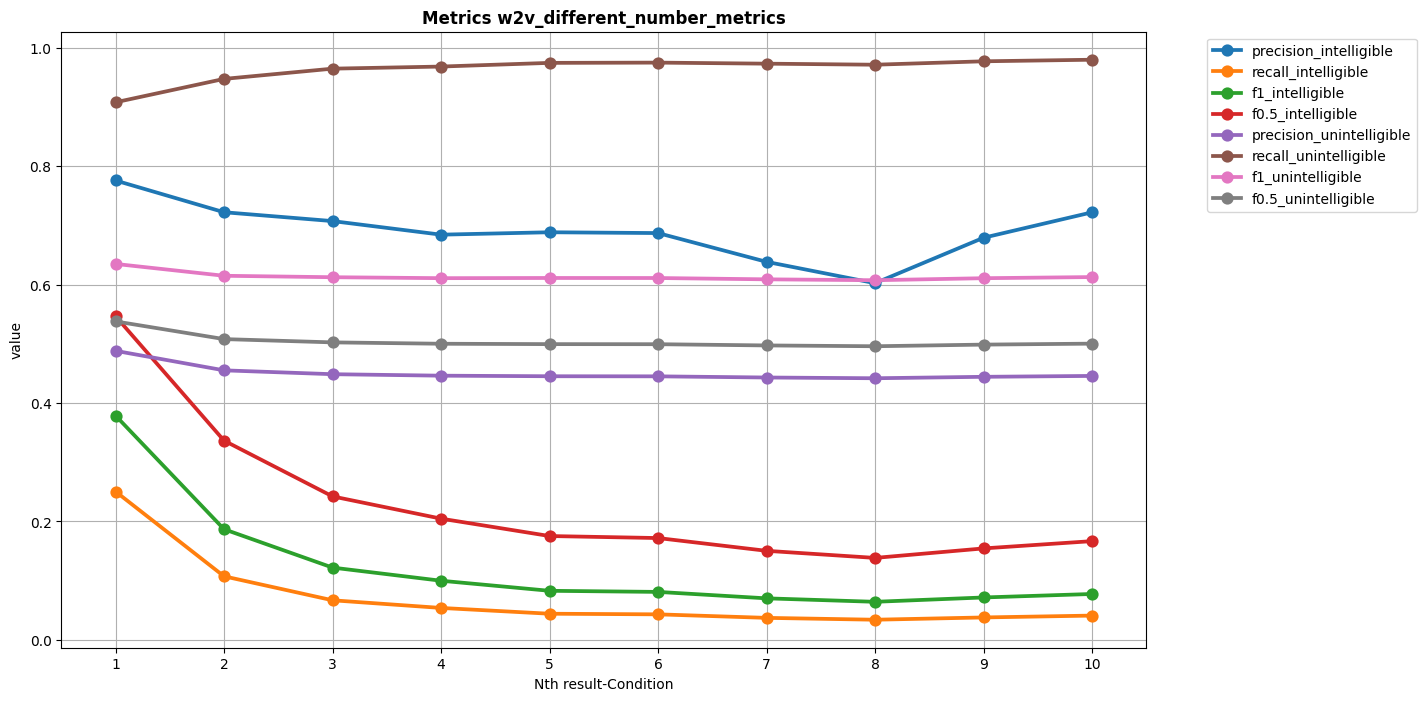

In [24]:
display_pointplot(w2v_metrics_df,'w2v_different_number_metrics') 

## We are comparing whisper at temperature 0.3, 0.5 and 0.7

In [25]:
# Loading whisper data - multiple results 
mooc_whisper03_processed_output =  "./tst_json_files/transcription_output/whisper_processed_output/whisper03_output.json"
mooc_whisper05_processed_output =  "./tst_json_files/transcription_output/whisper_processed_output/whisper05_output.json"
mooc_whisper07_processed_output =  "./tst_json_files/transcription_output/whisper_processed_output/whisper07_output.json"

### adapting whisper's intelligibility labels

In [26]:
# So here we collect the list of true_labels (intelligiblitity), and CMUD representations of each system
def two_model_intelligibility_labels(whisper_processed_output, w2v_processed_output):
    whisper_json_loaded = load_json(whisper_processed_output) # json loaded via the path
    w2v_json_loaded = load_json(w2v_processed_output)
    true_cmud = []
    true_labels = []
    whisper_judge_phonetic = []
    for key, value in whisper_json_loaded.items():#because whisper processed result contains three values (somewith filled ones, we dont refill them)
        true_cmud.append(value['true_phonetic_rep']) # the true phone repre to be compared with phone repre CMUDict
        true_labels.append(value['trueLabel']) # the given label; to be compared with WHISPER phone rep and true_cmud
        whisper_judge_phonetic.append(value['top res']) 

    w2v_judge_phonetic = []
    dummy_result={'model_transcription': 'N/A', 'confidence score': 0, 'model_phonetic_rep': 'N/A'}
    for key, value in w2v_json_loaded.items():  ## Because not every w2v output is more than 3 results, we fill if any output is less than 3 with dummy_result
        if len(value['top res']) == 1:
            w2v_judge_phonetic.append([value['top res'][0],dummy_result, dummy_result])             
        if len(value['top res']) == 2:                
            w2v_judge_phonetic.append([value['top res'][0], value['top res'][1], dummy_result])
        if len(value['top res']) >= 3:                       
            w2v_judge_phonetic.append(value['top res'][0:3])
    
    return true_labels, true_cmud, whisper_judge_phonetic, w2v_judge_phonetic

In [27]:
single_true_labels, true_cmuds, whisper07_judge_phonetic, w2v_judge_phonetic = two_model_intelligibility_labels(mooc_whisper07_processed_output,mooc_w2v_processed_output)


In [28]:
# the function 'comparing' will be used in the function compare_make_three_lists
def comparing(true_cmud, whisper, w2v, confidence_threshold):
# compare true cmud 
    num_collection = [1,2,3]
    intelligiblity_labels = []
    confi_whisper = [i['confidence score'] for i in whisper[0:3]]
    confi_w2v = [i['confidence score'] for i in w2v[0:3]]
    
    for num in num_collection:
        l_whisper=[i['model_phonetic_rep'] for i in whisper[0:num]]
        l_w2v=[i['model_phonetic_rep'] for i in w2v[0:num]]
        #norm_confi_whisper = [i for i in normalized_whisper[0:num]]
        adapted_confi_whisper = [i for i in confi_whisper[0:num]]
        #norm_confi_w2v = [i for i in normalized_w2v[0:num]]  
        adapted_confi_w2v = [i for i in confi_w2v[0:num]]  
        if true_cmud in (l_whisper + l_w2v):
            intelligiblity_labels.append('intelligible')
        elif true_cmud not in (l_whisper + l_w2v):
            if sum(adapted_confi_whisper) >= confidence_threshold and sum(adapted_confi_w2v) >= confidence_threshold: 
                intelligiblity_labels.append('unintelligible')
            else:
                intelligiblity_labels.append('intelligible')
    return intelligiblity_labels
    
# now making three list constrained by a confidence score:
def compare_make_three_lists(true_cmuds, whisperN_judge_phonetic, w2v_judge_phonetic, confidence_threshold): #confidence_threshold):
    l_one = [] 
    l_two = []
    l_three = []
    for  true_cmud, whisper, w2v in zip(true_cmuds, whisperN_judge_phonetic, w2v_judge_phonetic):
        list_item = comparing(true_cmud, whisper, w2v, confidence_threshold = confidence_threshold) #confidence_score=confidence_threshold)
        l_one.append(list_item[0])
        l_two.append(list_item[1])
        l_three.append(list_item[2])
    return l_one, l_two, l_three

In [29]:
# obtaining whisper judge at three temperature values and w2v 
single_true_labels, true_cmuds, whisper03_judge_phonetic, w2v_judge_phonetic = two_model_intelligibility_labels(mooc_whisper03_processed_output,mooc_w2v_processed_output)
single_true_labels, true_cmuds, whisper05_judge_phonetic, w2v_judge_phonetic = two_model_intelligibility_labels(mooc_whisper05_processed_output,mooc_w2v_processed_output)
single_true_labels, true_cmuds, whisper07_judge_phonetic, w2v_judge_phonetic = two_model_intelligibility_labels(mooc_whisper07_processed_output,mooc_w2v_processed_output)


In [30]:

def confidence_summation(judge_phonetic):
    total_three = []
    total_two = []
    total_one = []
    for item in judge_phonetic:
        three_sum = 0
        two_sum = 0
        one_sum = 0
        for i, subitem in enumerate(item):
            three_sum += subitem['confidence score']
            if i <= 1:
                two_sum += subitem['confidence score']
            if i == 0:
                one_sum += subitem['confidence score']
        total_three.append(three_sum)
        total_two.append(two_sum)
        total_one.append(one_sum)
    return total_three, total_two, total_one

In [31]:
# showing an examplew
print(whisper07_judge_phonetic[7:10])
t3, t2, t1 = confidence_summation(whisper07_judge_phonetic[7:10])
print(t3)
print(t2)
print(t1)

[[{'model_transcription': 'found', 'confidence score': 0.195, 'model_phonetic_rep': 'F AW1 N D'}, {'model_transcription': 'find', 'confidence score': 0.065, 'model_phonetic_rep': 'F AY1 N D'}, {'model_transcription': 'soldiers founds', 'confidence score': 0.073, 'model_phonetic_rep': 'N/A'}], [{'model_transcription': 'follow', 'confidence score': 0.304, 'model_phonetic_rep': 'F AA1 L OW0'}, {'model_transcription': 'ah', 'confidence score': 0.031, 'model_phonetic_rep': 'AA1'}, {'model_transcription': 'all around', 'confidence score': 0.159, 'model_phonetic_rep': 'N/A'}], [{'model_transcription': 'bye all', 'confidence score': 0.173, 'model_phonetic_rep': 'N/A'}, {'model_transcription': 'bold', 'confidence score': 0.114, 'model_phonetic_rep': 'B OW1 L D'}, {'model_transcription': 'bowler', 'confidence score': 0.215, 'model_phonetic_rep': 'B OW1 L ER0'}]]
[0.333, 0.494, 0.502]
[0.26, 0.33499999999999996, 0.287]
[0.195, 0.304, 0.173]


In [32]:
t307_confi, t207_confi, t107_confi =confidence_summation(whisper07_judge_phonetic)
w2vt3_confi,w2vt2_confi, w2vt1_confi = confidence_summation(w2v_judge_phonetic)

In [33]:
def show_confi_distribution_two_groups(values1, name1, values2, name2):
    # Combine both groups into one DataFrame
    df = pd.DataFrame({
        "value": values1 + values2,
        "group": [name1] * len(values1) + [name2] * len(values2)
    })

    # Define bins and labels
    bins = [-float("inf"), 0.25, 0.5, 1.0, float("inf")]
    labels = ["< 0.25", "0.25 - 0.5", "0.5 - 1", "> 1"]
    df["category"] = pd.cut(df["value"], bins=bins, labels=labels)

    # Count how many in each category per group
    counts = df.groupby(["group", "category"], observed=False).size().reset_index(name="count")

    # --- Plot ---
    plt.figure(figsize=(7,4))
    sns.barplot(
        data=counts,
        x="category",
        y="count",
        hue="group",           # show both groups side-by-side
        palette="pastel"
    )

    plt.title("Distribution of Values by Group")
    plt.xlabel("Value Category")
    plt.ylabel("Count")
    plt.legend(title="Group")
    plt.tight_layout()
    plt.savefig(f"./graphs/{name1}_{name2}", bbox_inches='tight')
    plt.show()
    plt.close()


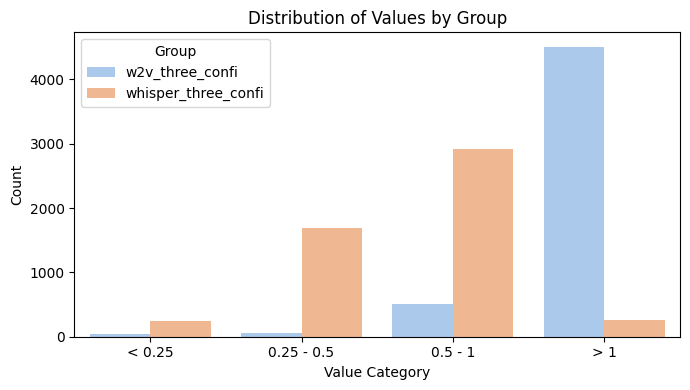

In [34]:
# when three confidence scores are added 
show_confi_distribution_two_groups(t307_confi, 'whisper_three_confi', w2vt3_confi,'w2v_three_confi')

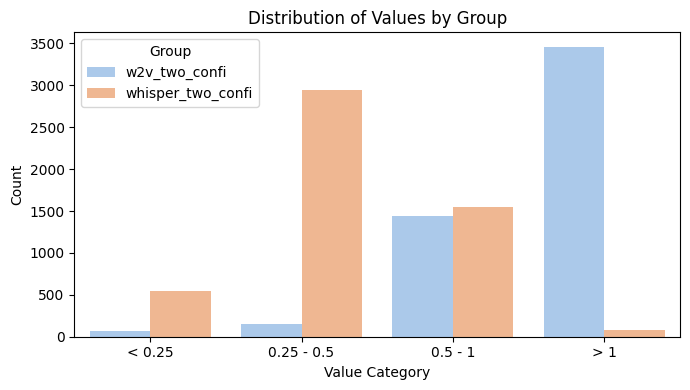

In [35]:
# when two confidence scores are added 
show_confi_distribution_two_groups(t207_confi, 'whisper_two_confi', w2vt2_confi,'w2v_two_confi')

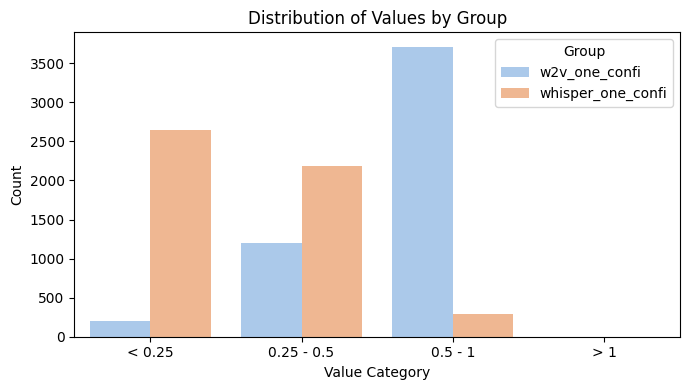

In [36]:
# when one are added 
show_confi_distribution_two_groups(t107_confi, 'whisper_one_confi', w2vt1_confi,'w2v_one_confi')

In [37]:
# taking an example of 0.4 confidence threshold for three temperatures at top1, top2, top3 results
lst_03_n1,lst_03_n2,lst_03_n3 = compare_make_three_lists(true_cmuds, whisper03_judge_phonetic, w2v_judge_phonetic,confidence_threshold = 0.4) 
l1_05_n1,l2_05_n2,l3_05_n3 = compare_make_three_lists(true_cmuds, whisper05_judge_phonetic, w2v_judge_phonetic,confidence_threshold = 0.4)
l1_07_n1,l2_07_n2,l3_07_n3 = compare_make_three_lists(true_cmuds, whisper07_judge_phonetic, w2v_judge_phonetic,confidence_threshold = 0.4) 

In [38]:
# inspecting
print(len(lst_03_n1))
print(lst_03_n1[0:10])

5115
['intelligible', 'intelligible', 'intelligible', 'intelligible', 'intelligible', 'intelligible', 'intelligible', 'intelligible', 'intelligible', 'intelligible']


In [39]:
confidence_thresholds = [0.1,0.2,0.3,0.4,0.5]
#confidence_thresholds = [0.6, 0.7, 0.8, 0.9, 1]

def results_at_confidence(confidence_thresholds, whisper_temp_phonetic, w2v_judge_phonetic, true_cmuds, true_labels):
    total_l = []    
    for confidence_value in confidence_thresholds:
       # print(confidence_value)
        lst_top_1,lst_top_2,lst_top_3 = compare_make_three_lists(true_cmuds, whisper_temp_phonetic, w2v_judge_phonetic, confidence_threshold = confidence_value)
        total_l.append([lst_top_1,lst_top_2,lst_top_3])
        flatten_total_l = [x for xs in total_l for x in xs] # the flatten_total is a list of jugdges starting from 0.1 confidence threshold for top 1 ,top 2,  top 3 and increase confi threshold 
    metrics_lst = [calculate_metrics(true_labels,i) for i in flatten_total_l]
        
    return metrics_lst


In [40]:
## testing
metrics_lst03 = results_at_confidence(confidence_thresholds, whisper03_judge_phonetic, w2v_judge_phonetic, true_cmuds, single_true_labels)
print(len(metrics_lst03))

15


In [41]:
lst03_metrics_df = converting_metri2Df(metrics_lst03)

### So we present results at three temperature values (0.3, 0.5, 0.7) three top few (top1, top2, top3) and five confidence thresholds. In particular for confidence threshold, I originally used 0.1 to 0.9, however, at 0.5 there is sharp decrease in precision for both intelligible and unintelligble classes. So I moved from 0.1, 0.3 to 0.9 to from 0.1 to 0.5

### 1. at temperature 0.3 of whipser, the metrics result starting from confidence threhold 0.1 with top 1, top 2, top 3, and then confidence thredshold 0.2with top 1 top 2 top 3

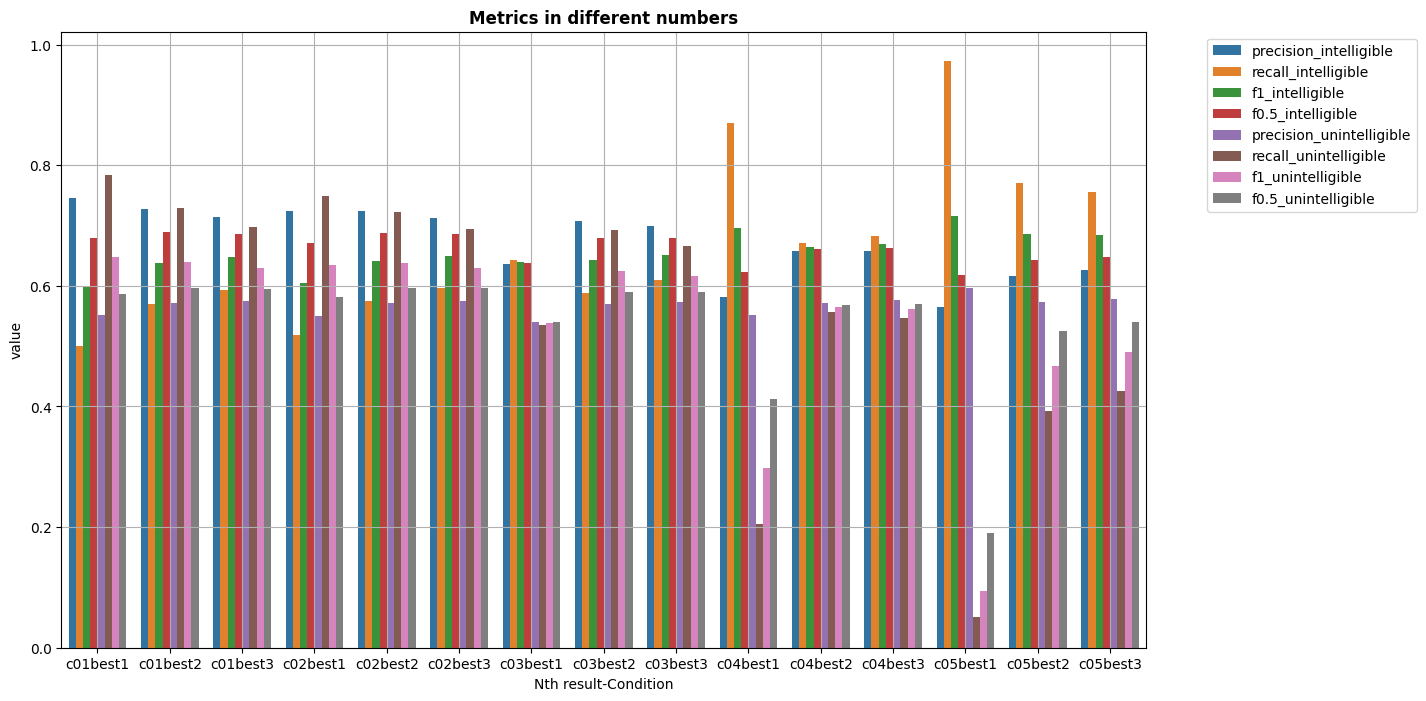

In [137]:
# the t_lst is a hardcoded list of confidence_threshold and top_result to be used for metrics visualisation later
# a total of 15 are used for each temperature value
t_lst=['c01best1','c01best2','c01best3','c02best1','c02best2','c02best3','c03best1','c03best2','c03best3','c04best1','c04best2','c04best3','c05best1','c05best2','c05best3']
mapping = {str(i+1): t_lst[i] for i in range(len(t_lst))}
mapped_lst03_metrics_df = [{**d, 'number': mapping[d['number']]} for d in lst03_metrics_df] # the mapped list turns the x axis into confidence and top n values

display_barplot(mapped_lst03_metrics_df)

In [138]:
# showing an example when confidence threshold is 0.3 and top2 results are used
print([{i['metric']:i['value']} for i in mapped_lst03_metrics_df if i['number']=='c03top2'])

[]


### the lineplot of these metrics moving from Confidence-Top iteration at temperature 0.3

In [139]:

def show_lineplots(data):
    df = pd.DataFrame(data)
    df["condition"] = df["number"].str.extract(r"(c\d+)")
    df["variant"] = df["number"].str.extract(r"(best\d+)")
    
    metrics = df["metric"].unique()
    num_metrics = len(metrics)

    ncols = 2
    nrows = math.ceil(num_metrics / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows), sharex=True)
    axes = axes.flatten()

    for ax, metric in zip(axes, metrics):
        sns.lineplot(
            data=df[df["metric"] == metric],
            x="condition",
            y="value",
            hue="variant",
            style="variant",
            markers=True,
            dashes=True,
            ax=ax
        )
        ax.set_title(f"Metric: {metric}", fontweight="bold")
        ax.set_xlabel("Confidence thresholds c01–c05")
        ax.set_ylabel("Value")
        ax.grid(True)
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left",title="best_n")

    # Hide any unused subplots (if num_metrics < nrows*ncols)
    for ax in axes[num_metrics:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()
    plt.close()


### at whisper temperature 0.3, the lineplot of these metrics  to see the change of each metric with the growth of confidence score from 0.1 to 0.5 in three values of top n


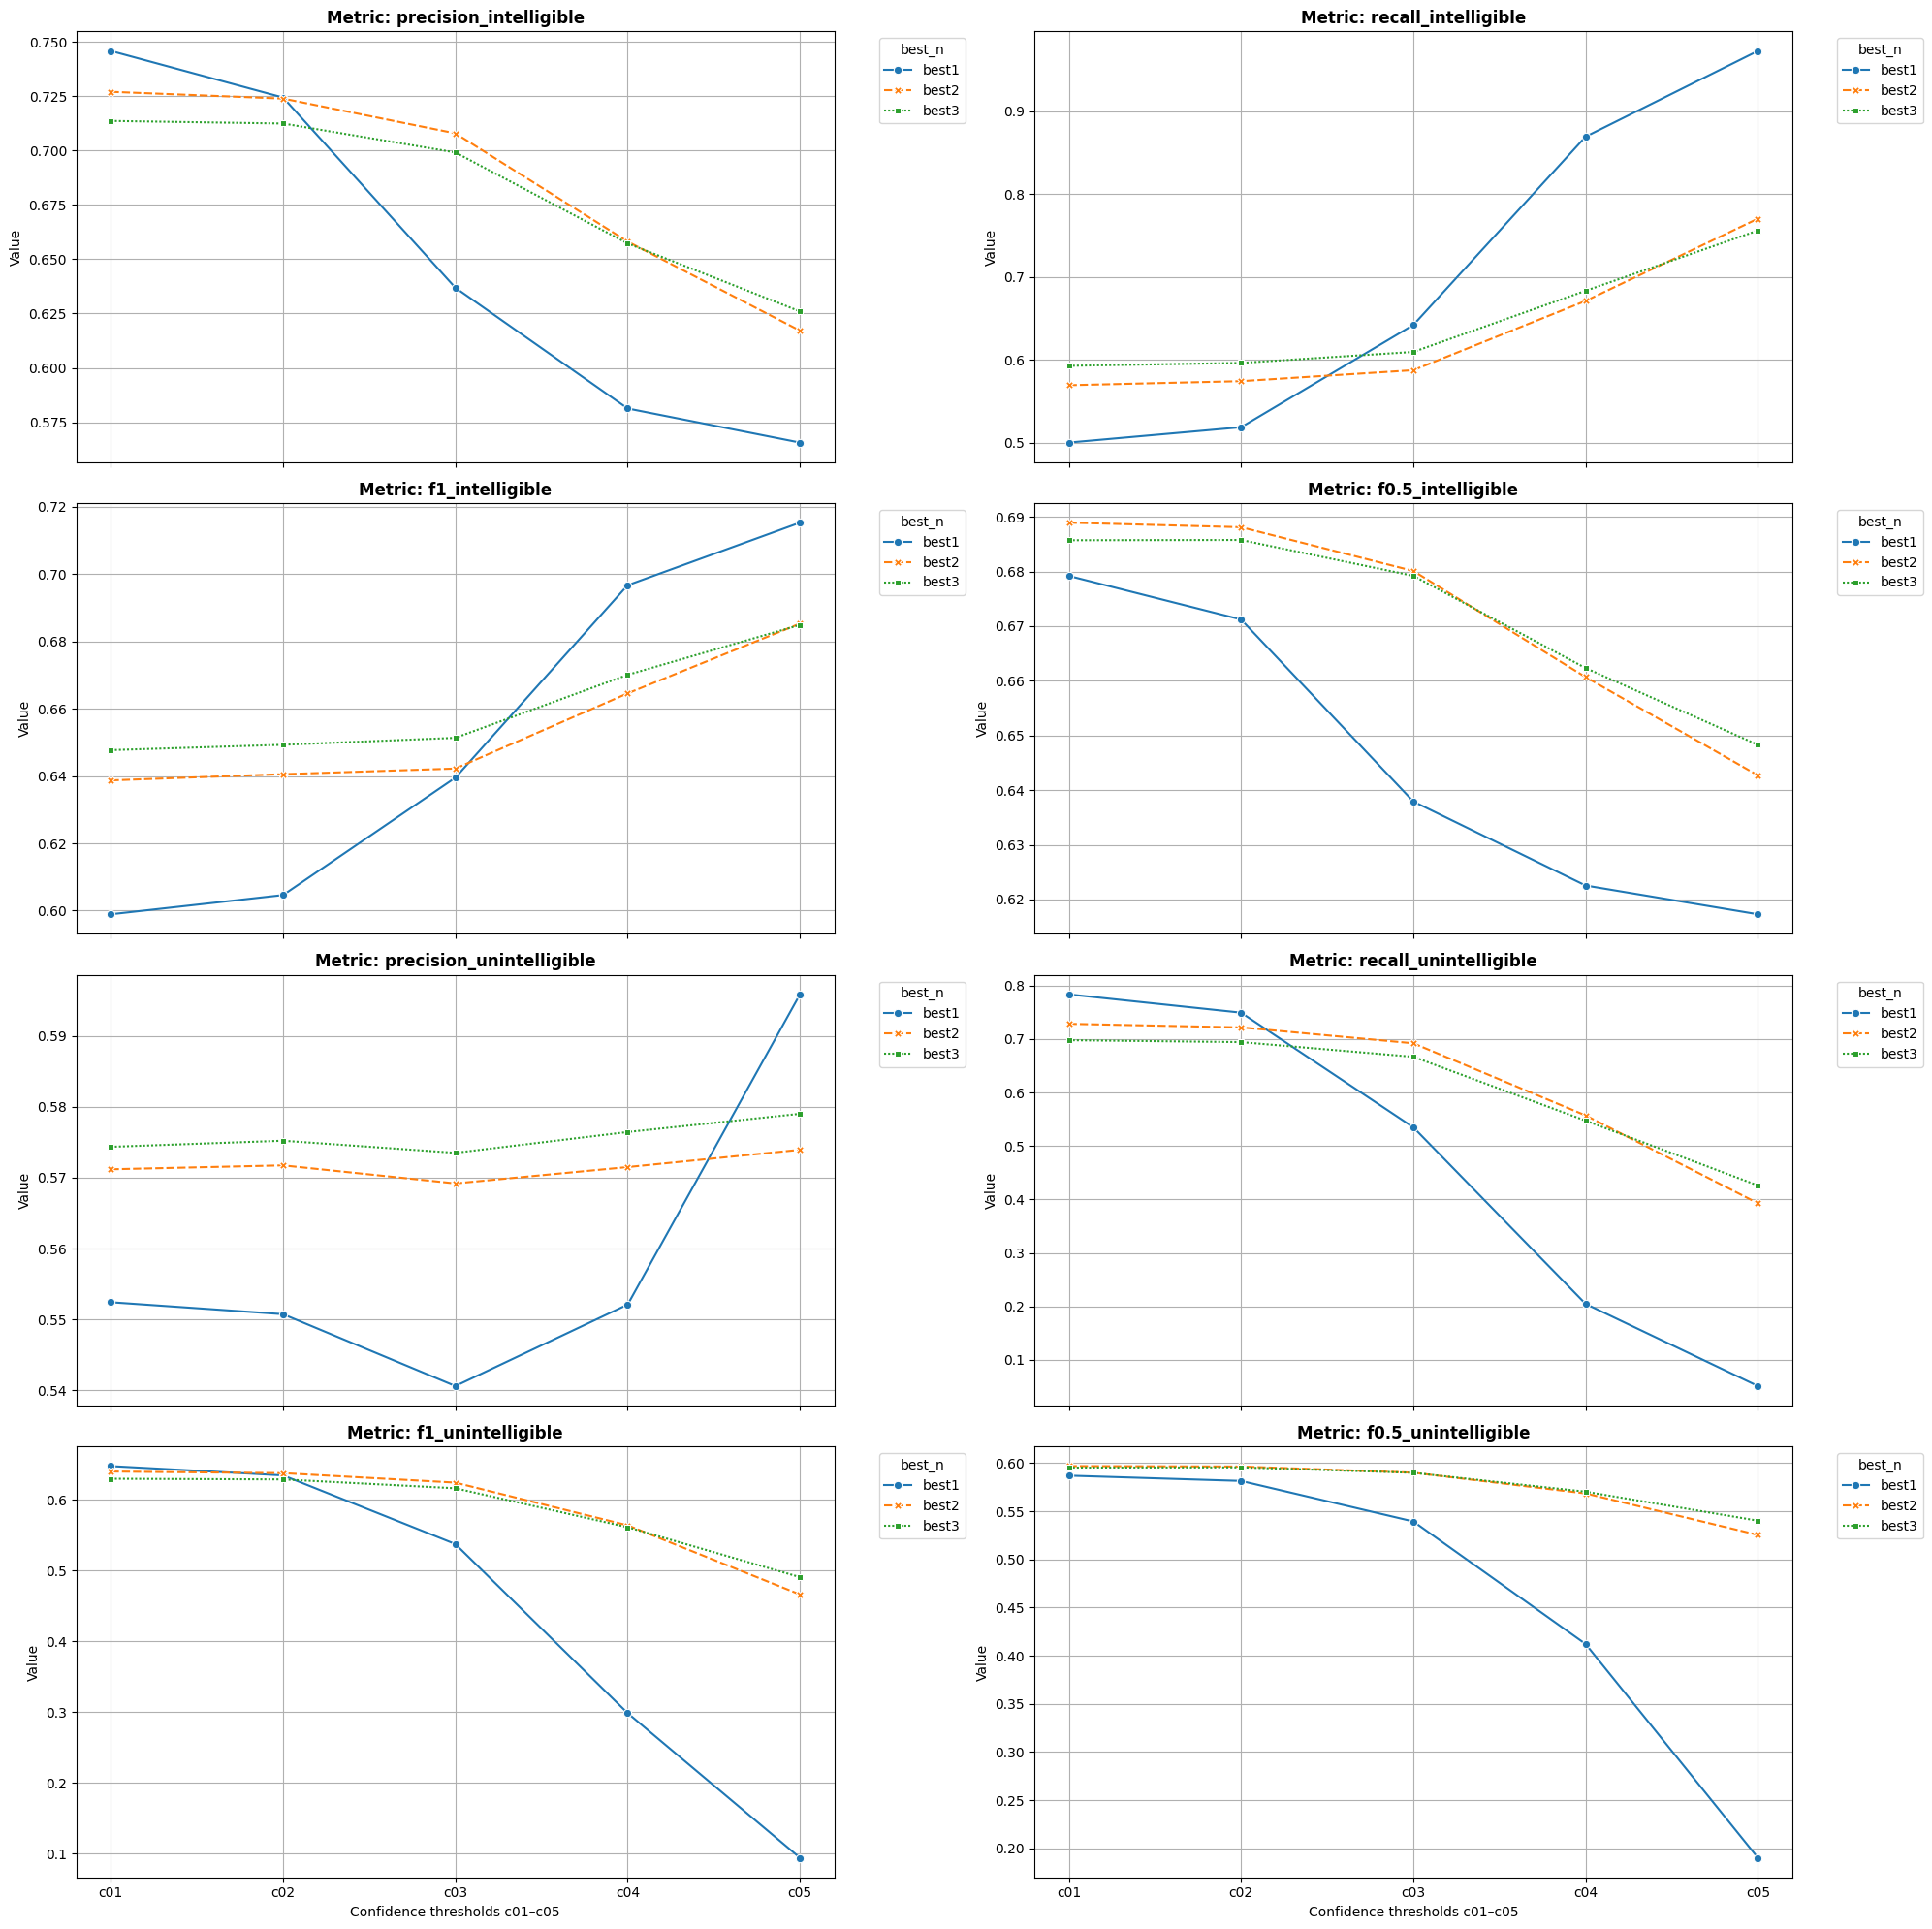

In [140]:
show_lineplots(mapped_lst03_metrics_df)

In [141]:
# getting the confidence-top value for each best metric
def best_metrics(data):
    df = pd.DataFrame(data)
    best_per_metric = df.loc[df.groupby("metric")["value"].idxmax()]
    best_dict = {
    row["metric"]: (row["number"], row["value"])
    for _, row in best_per_metric.iterrows()
    }

    return best_dict


### Showing the best metrics at temperature 0.3

In [142]:
best_metrics(mapped_lst03_metrics_df)

{'f0.5_intelligible': ('c01best2', 0.6889264581572273),
 'f0.5_unintelligible': ('c01best2', 0.596944343397599),
 'f1_intelligible': ('c05best1', 0.7153134635149023),
 'f1_unintelligible': ('c01best1', 0.6479441997063142),
 'precision_intelligible': ('c01best1', 0.7458333333333333),
 'precision_unintelligible': ('c05best1', 0.5958549222797928),
 'recall_intelligible': ('c05best1', 0.9727463312368972),
 'recall_unintelligible': ('c01best1', 0.7833999112294718)}

### 2. at temperature 0.5 of whipser, the metrics result starting from confidence threhold 0.1 with top 1, top 2, top 3, and then confidence thredshold 0.2with top 1 top 2 top 3

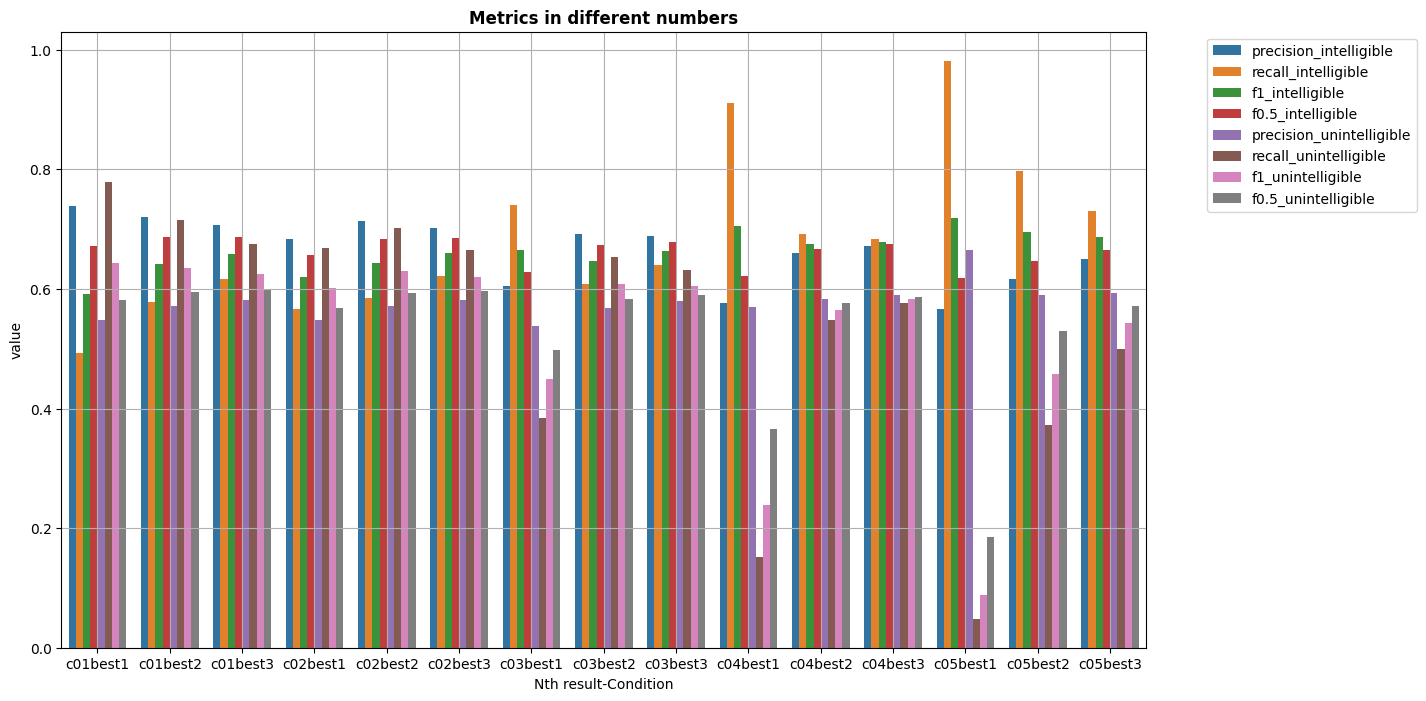

In [143]:
metrics_lst05 = results_at_confidence(confidence_thresholds, whisper05_judge_phonetic,w2v_judge_phonetic, true_cmuds,single_true_labels)
lst05_metrics_df = converting_metri2Df(metrics_lst05)
mapped_lst05_metrics_df = [{**d, 'number': mapping[d['number']]} for d in lst05_metrics_df]
display_barplot(mapped_lst05_metrics_df)

## the pointplot of these metrics moving from Confidence-Top iteration at temperature 0.5


### at whisper temperature 0.5, the lineplot of these metrics to see the trends of each metric with the growth of confidence score from 0.1 to 0.5 in three values of top n

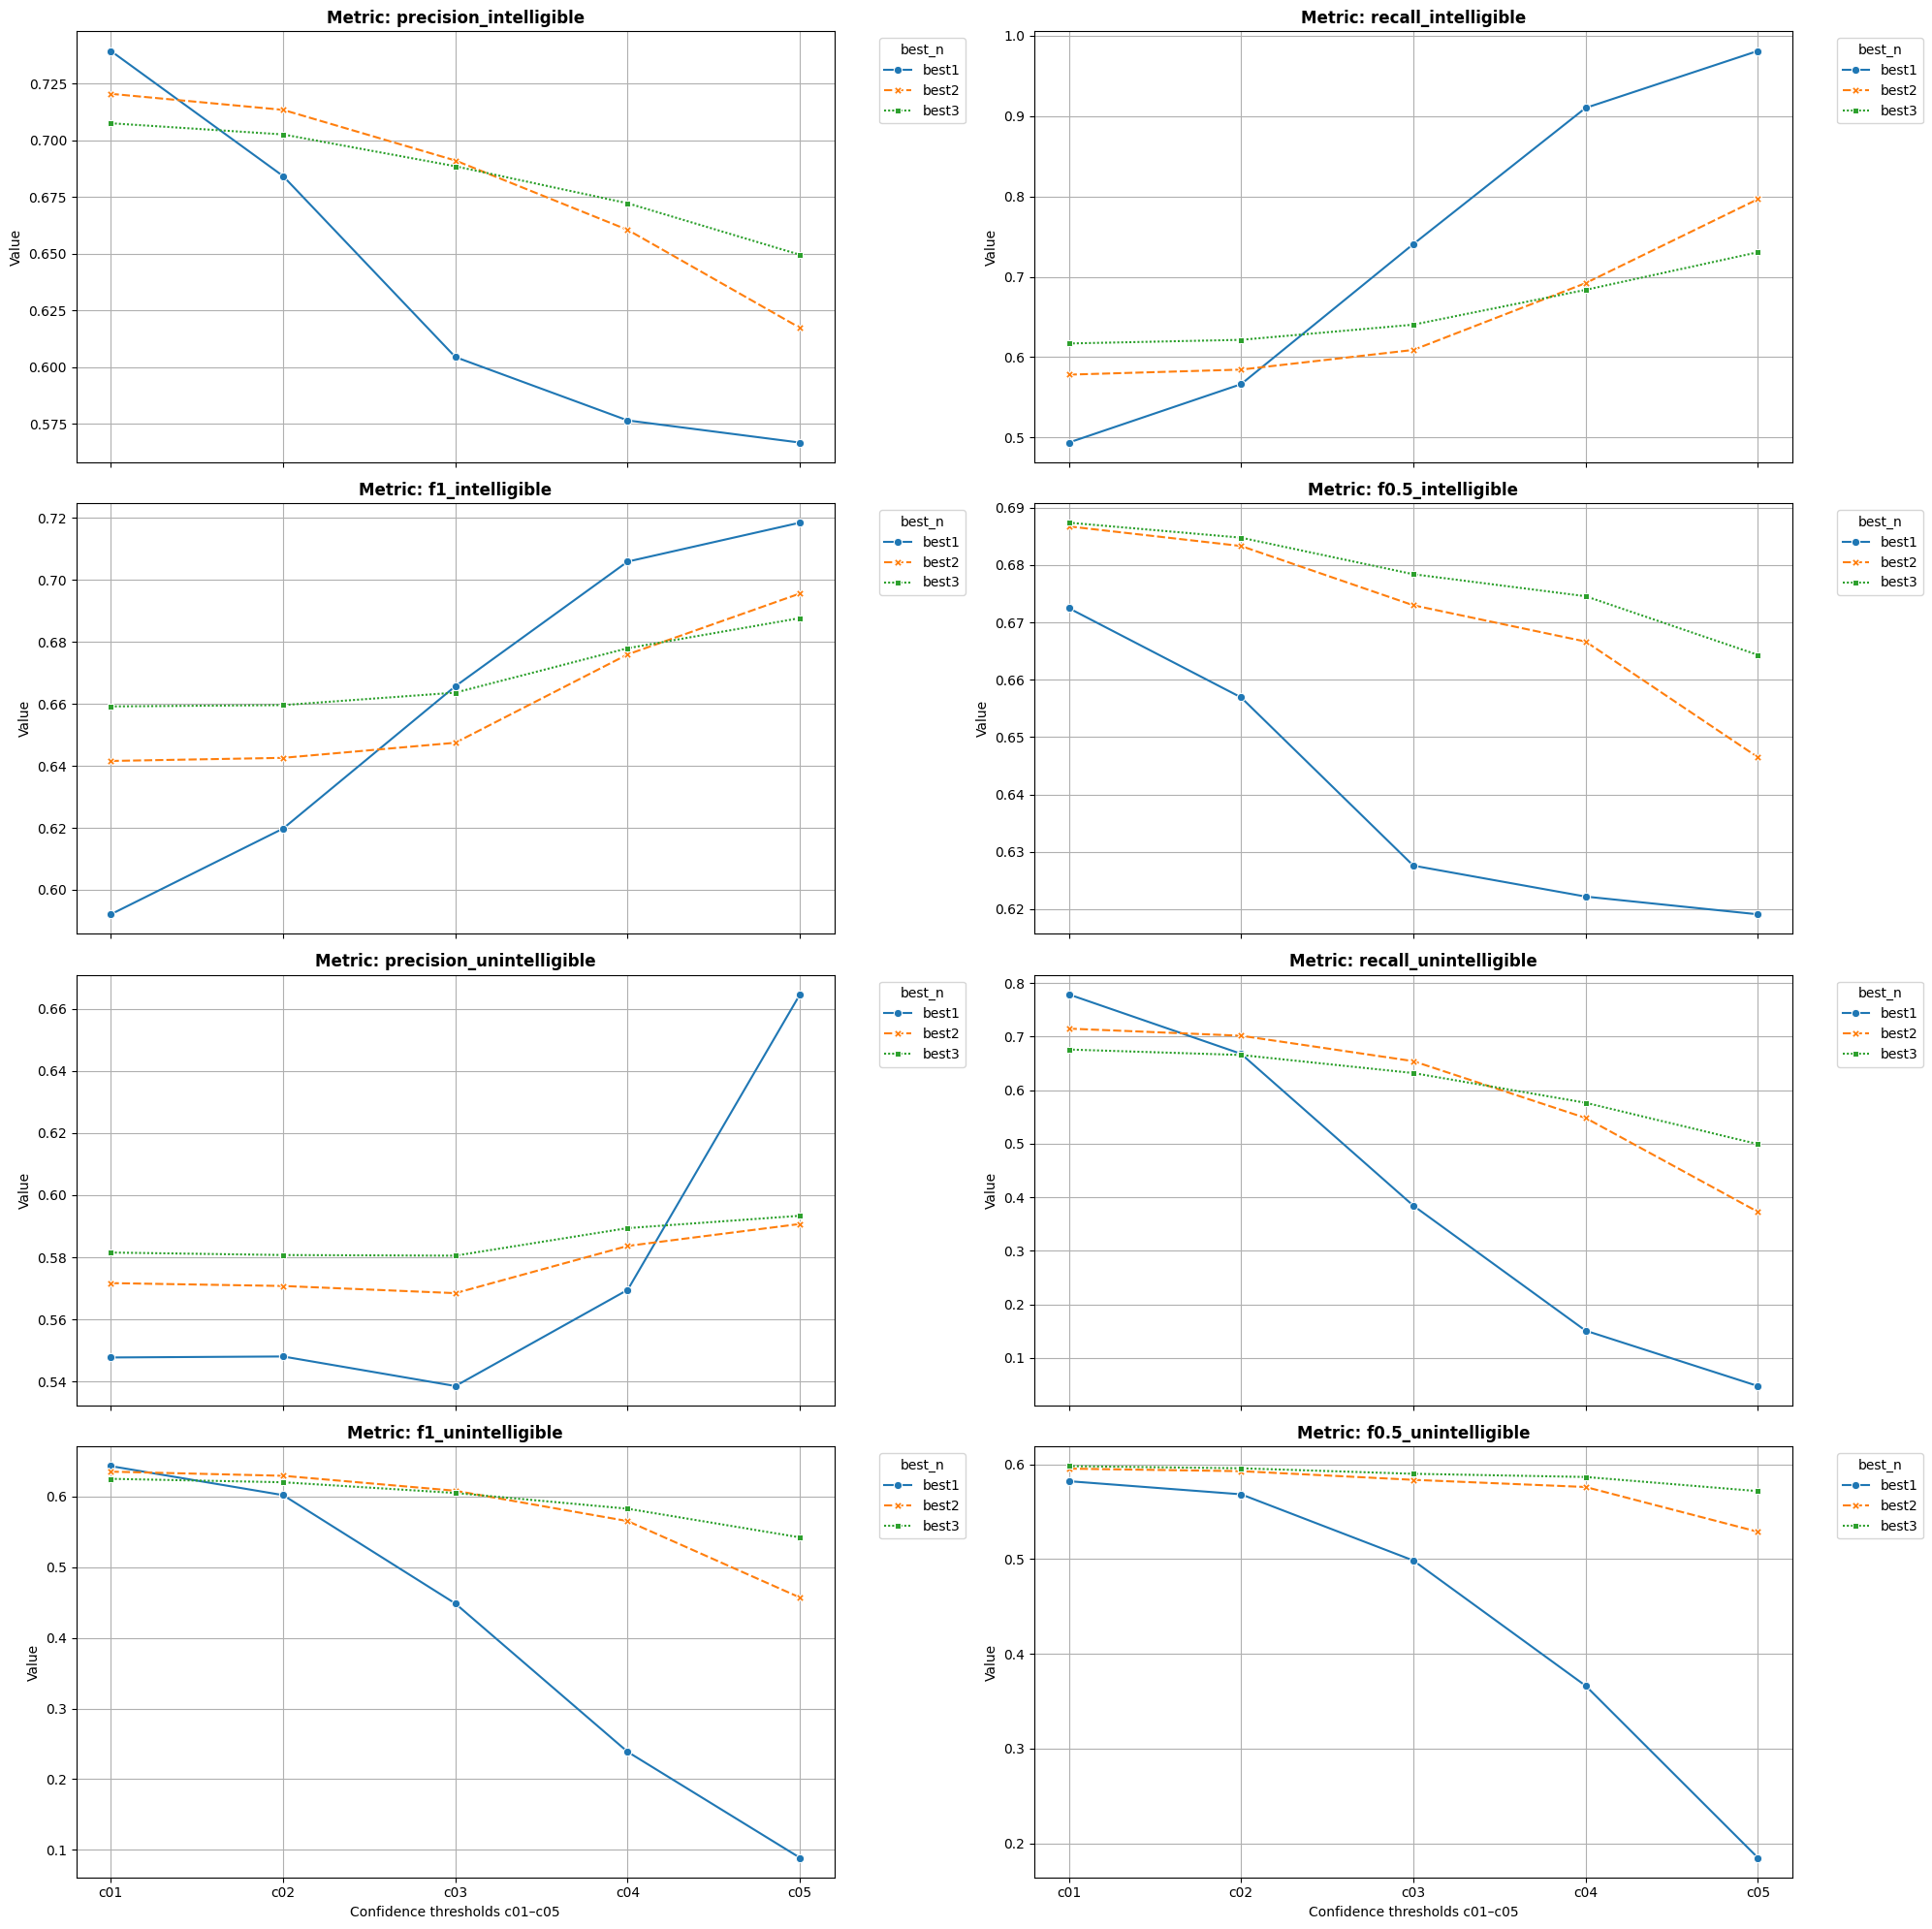

In [144]:
show_lineplots(mapped_lst05_metrics_df)

### Showing the best metrics at temperature 0.5

In [145]:
best_metrics(mapped_lst05_metrics_df)

{'f0.5_intelligible': ('c01best3', 0.6873735014790596),
 'f0.5_unintelligible': ('c01best3', 0.598240238824731),
 'f1_intelligible': ('c05best1', 0.7185261003070624),
 'f1_unintelligible': ('c01best1', 0.6432105552501374),
 'precision_intelligible': ('c01best1', 0.7394034536891679),
 'precision_unintelligible': ('c05best1', 0.6645962732919255),
 'recall_intelligible': ('c05best1', 0.9811320754716981),
 'recall_unintelligible': ('c01best1', 0.7789613848202397)}

### 3. at temperature 0.7 of whipser, the metrics result starting from confidence threhold 0.1 with top 1, top 2, top 3, and then confidence thredshold 0.2with top 1 top 2 top 3

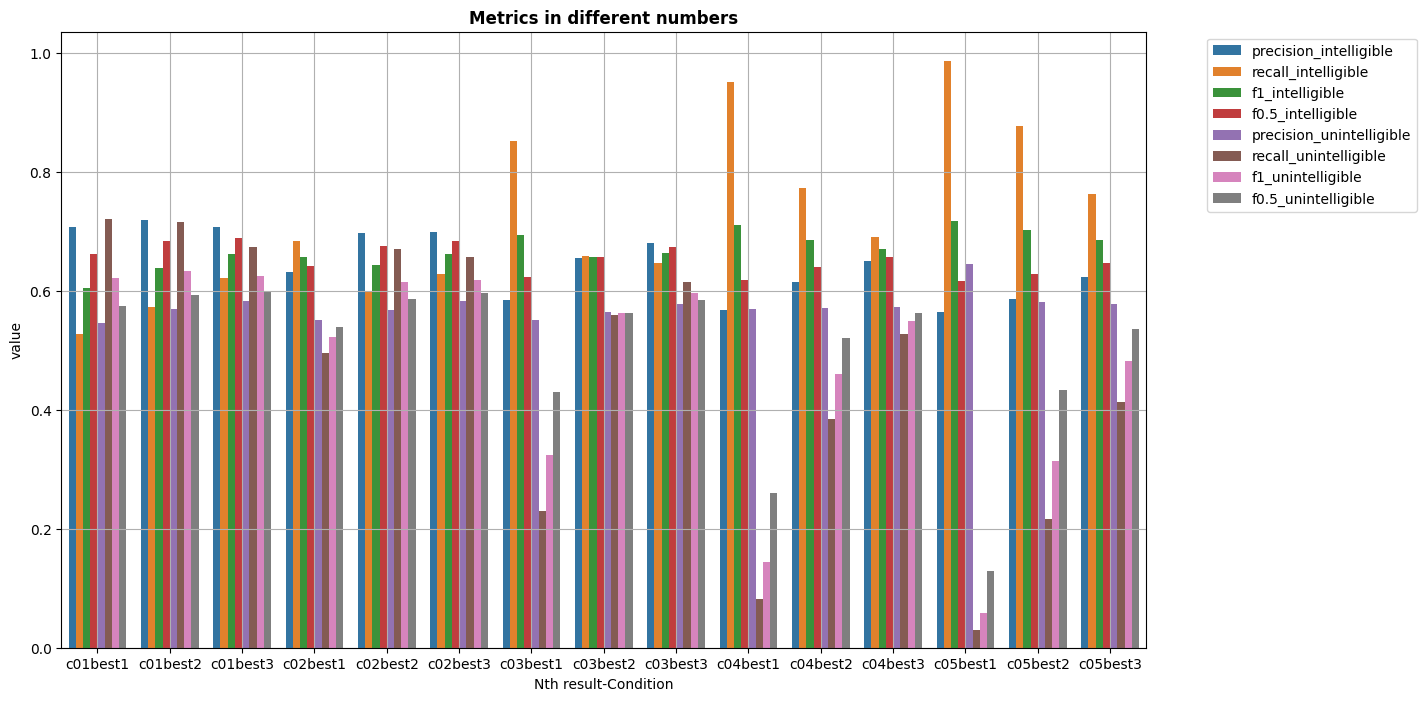

In [146]:
metrics_lst07 = results_at_confidence(confidence_thresholds, whisper07_judge_phonetic, w2v_judge_phonetic, true_cmuds,single_true_labels)
lst07_metrics_df = converting_metri2Df(metrics_lst07)

mapped_lst07_metrics_df = [{**d, 'number': mapping[d['number']]} for d in lst07_metrics_df]
display_barplot(mapped_lst07_metrics_df)

In [147]:
for x in mapped_lst07_metrics_df:
    if x['number']=='c01best3':
        print(x)

{'number': 'c01best3', 'metric': 'precision_intelligible', 'value': 0.7075208913649025}
{'number': 'c01best3', 'metric': 'recall_intelligible', 'value': 0.6212438853948288}
{'number': 'c01best3', 'metric': 'f1_intelligible', 'value': 0.6615813953488372}
{'number': 'c01best3', 'metric': 'f0.5_intelligible', 'value': 0.6884001858448197}
{'number': 'c01best3', 'metric': 'precision_unintelligible', 'value': 0.5833973866256725}
{'number': 'c01best3', 'metric': 'recall_unintelligible', 'value': 0.6737683089214381}
{'number': 'c01best3', 'metric': 'f1_unintelligible', 'value': 0.6253347064881565}
{'number': 'c01best3', 'metric': 'f0.5_unintelligible', 'value': 0.5994787141615986}


### the pointplot of these metrics moving from Confidence-Top iteration at temperature 0.7


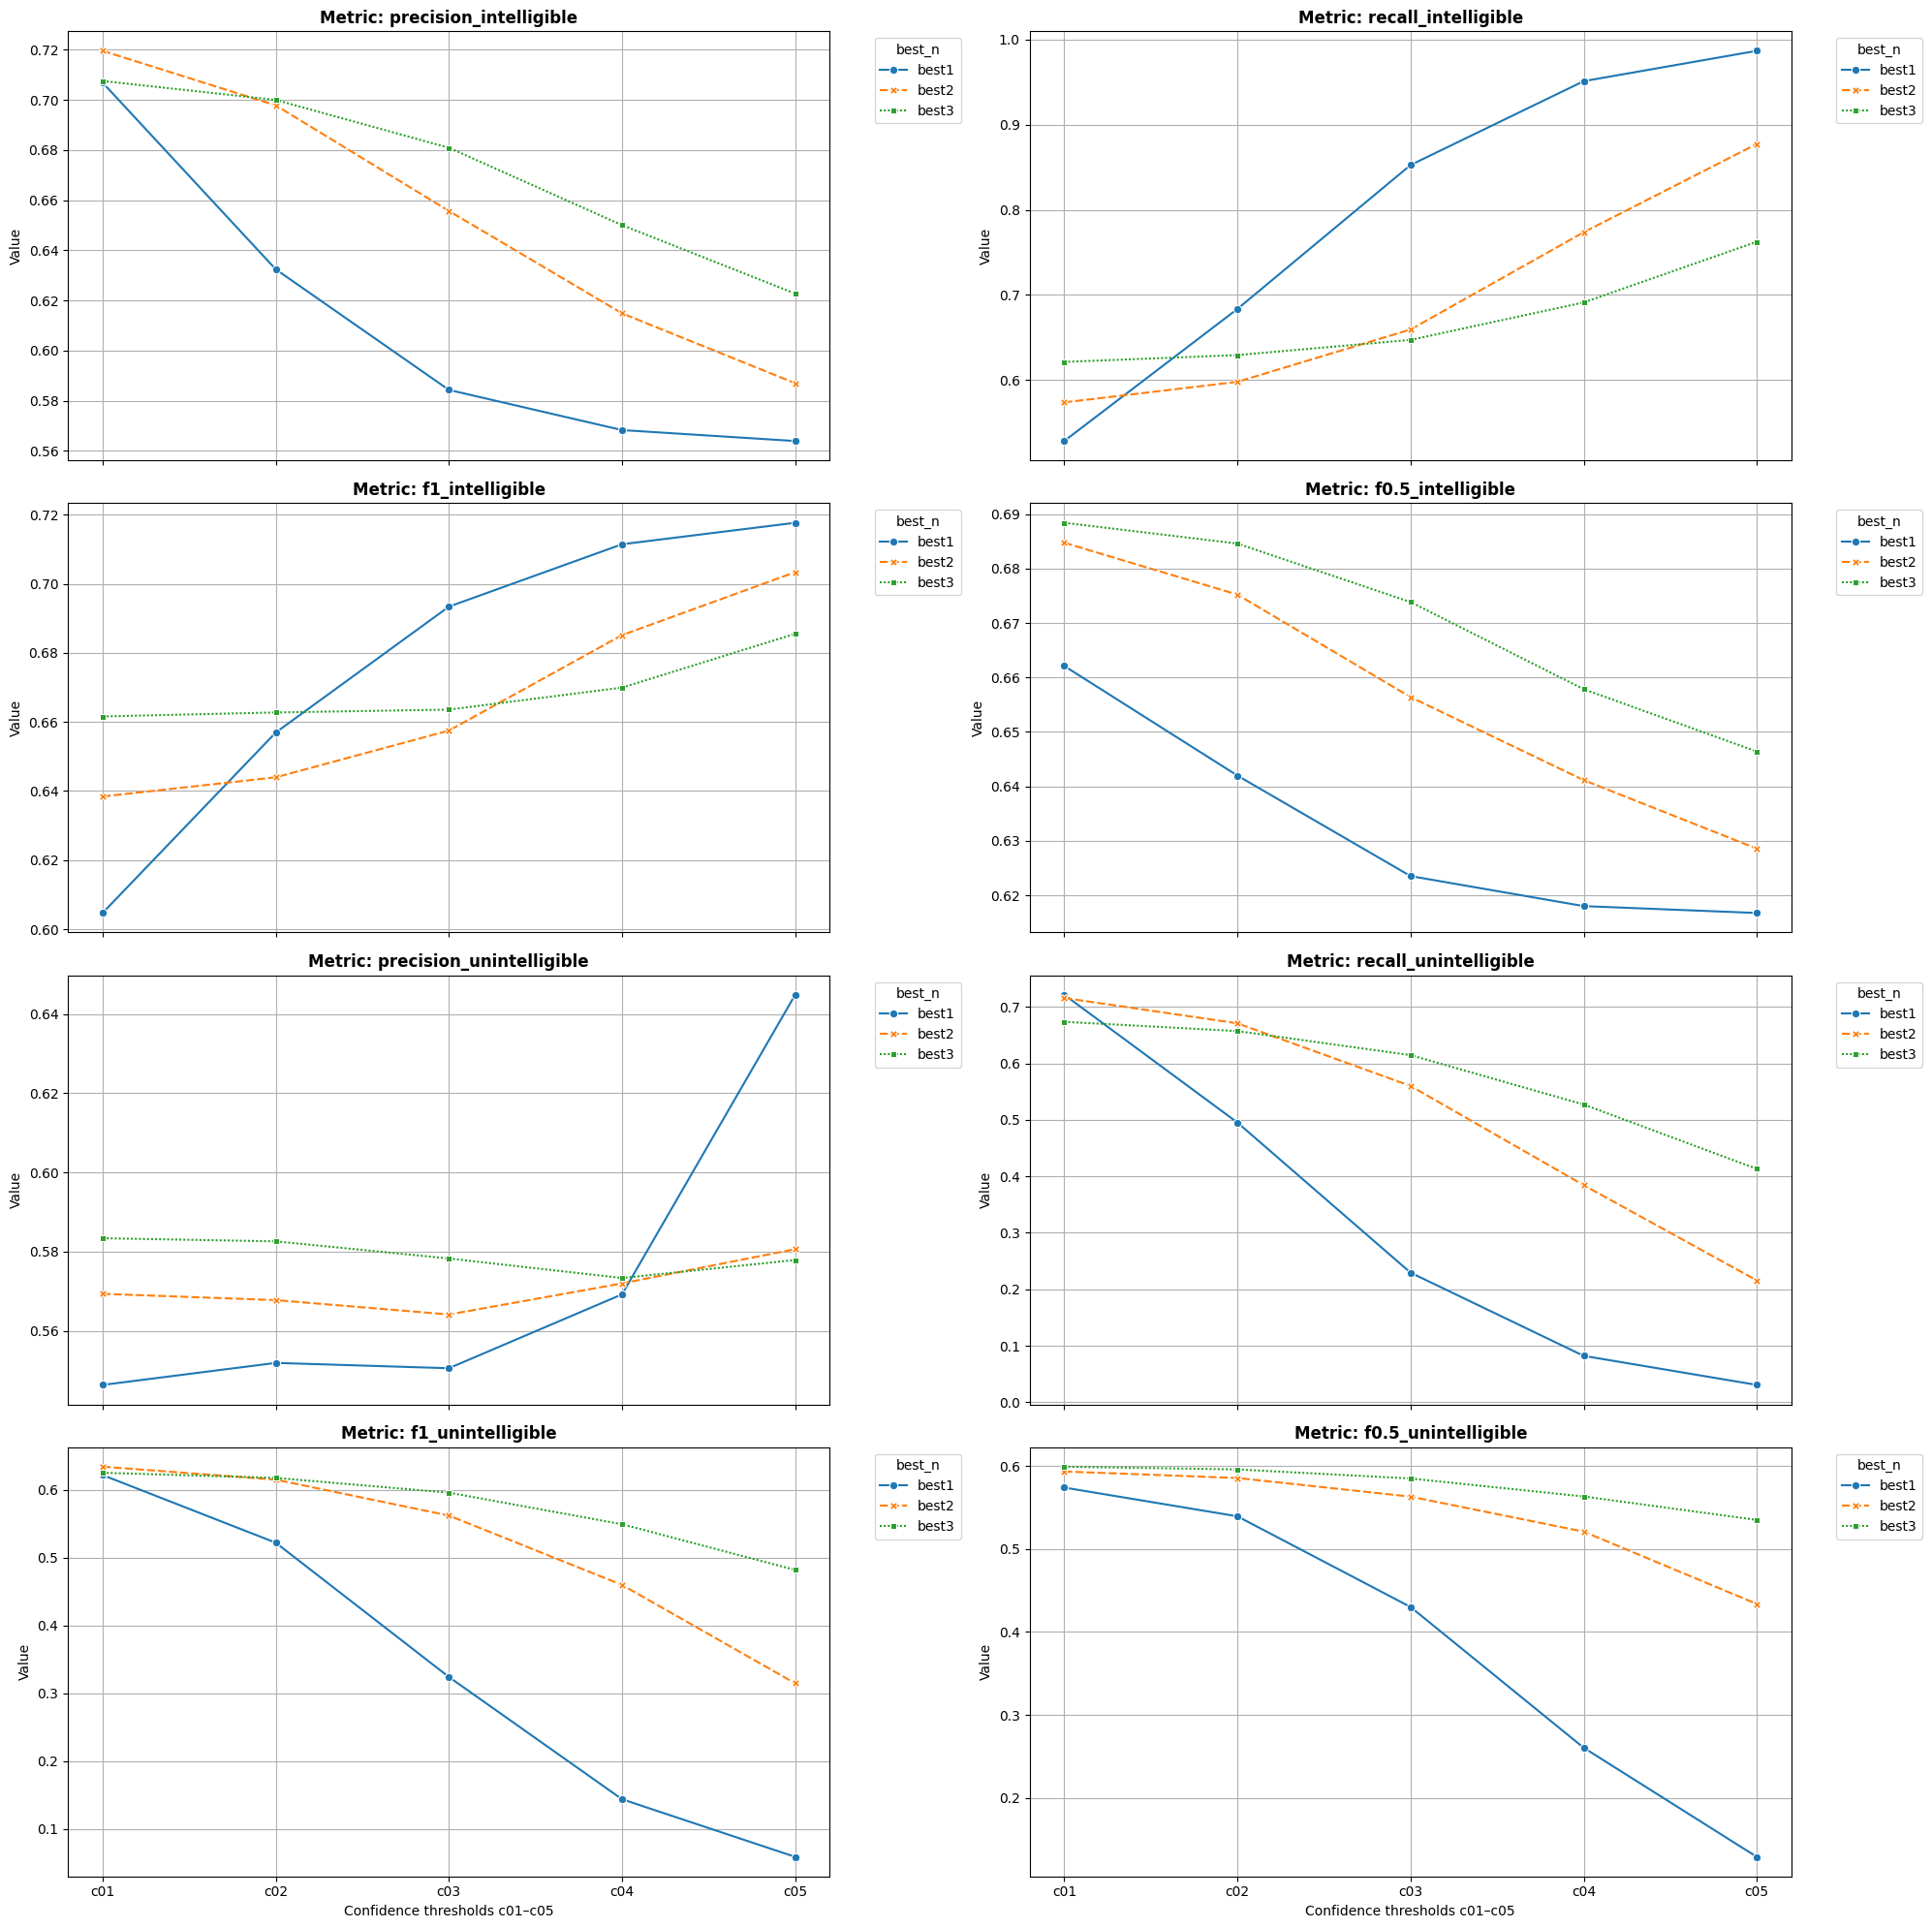

In [148]:
show_lineplots(mapped_lst07_metrics_df)

### Showing the best metrics at temperature 0.7

In [149]:
best_metrics(mapped_lst07_metrics_df)

{'f0.5_intelligible': ('c01best3', 0.6884001858448197),
 'f0.5_unintelligible': ('c01best3', 0.5994787141615986),
 'f1_intelligible': ('c05best1', 0.7176620076238882),
 'f1_unintelligible': ('c01best2', 0.6342902084152576),
 'precision_intelligible': ('c01best2', 0.7195442594215601),
 'precision_unintelligible': ('c05best1', 0.6448598130841121),
 'recall_intelligible': ('c05best1', 0.986722571628232),
 'recall_unintelligible': ('c01best1', 0.7217043941411452)}

In [150]:
## here we combine the data of mapped df 
x03_05_07 = [{'temp':0.3, 'metrics':mapped_lst03_metrics_df}, {'temp':0.5, 'metrics':mapped_lst05_metrics_df},{'temp':0.7, 'metrics':mapped_lst07_metrics_df}]


In [151]:

def comb_show_lineplots(data, filename, save_dir=None):
    """
    Plot all metrics across conditions, temps, and variants.
    Create separate figures for 'intelligible' and 'unintelligible'.

    Args:
        data (list of dict): structured data with temps and metrics
        filename (str): filename to save figure
        save_dir (str, optional): Folder to save figures (e.g., "graph").
                                  If None, figures won't be saved.
    """

    records = []
    for entry in data:
        temp = entry["temp"]
        for m in entry["metrics"]:
            rec = m.copy()
            rec["temp"] = temp
            records.append(rec)

    df = pd.DataFrame(records)

    df["condition"] = df["number"].str.extract(r"(c\d+)")
    df["n_variant"] = df["number"].str.extract(r"(best\d+)")
    df["t_variant"] = df["temp"].apply(lambda x: f"temp{int(x*10):02d}")
    df["variant_full"] = df["t_variant"] + df["n_variant"]
    df["confidence"] = df["condition"]

    df["group"] = df["metric"].apply(
        lambda x: "intelligible" if "intelligible" in x.lower() else "unintelligible"
    )

    palette = sns.color_palette(n_colors=df["t_variant"].nunique())
    t_to_color = {t: palette[i] for i, t in enumerate(sorted(df["t_variant"].unique()))}
    n_to_dash = {"best2": "dashed", "best3": "dotted"}  # explicit styles

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)

    # ---------- Plot for each group ----------
    for group_name, group_df in df.groupby("group"):
        metrics = group_df["metric"].unique()
        num_metrics = len(metrics)

        ncols = 2
        nrows = math.ceil(num_metrics / ncols)

        # Narrower figure
        fig, axes = plt.subplots(
            nrows=nrows,
            ncols=ncols,
            figsize=(20, 5 * nrows),
            sharex=True
        )
        axes = axes.flatten()

        for i, (ax, metric) in enumerate(zip(axes, metrics)):
            sub = group_df[group_df["metric"] == metric]

            for v in sub["variant_full"].unique():
                temp = v[:6]
                n = v[6:]
                sub_v = sub[sub["variant_full"] == v]
                if not sub_v.empty:
                    ax.plot(
                        sub_v["confidence"],
                        sub_v["value"],
                        label=v,
                        color=t_to_color.get(temp, "gray"),
                        linestyle=n_to_dash.get(n, "solid"),
                        marker="o"
                    )

            ax.set_title(f"Metric: {metric}", fontweight="bold")
            ax.set_xlabel("Confidence thresholds (c01–c05)")
            ax.set_ylabel("Value")
            ax.set_xticks(["c01", "c02", "c03", "c04", "c05"])
            ax.grid(True)

            if (i + 1) % ncols == 0:
                ax.legend(
                    bbox_to_anchor=(1.05, 1),
                    loc="upper left",
                    title="temp_best_n"
                )

        for ax in axes[num_metrics:]:
            ax.set_visible(False)

        plt.tight_layout()
        plt.subplots_adjust(right=0.85)

        if save_dir:
            plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')
        plt.show()


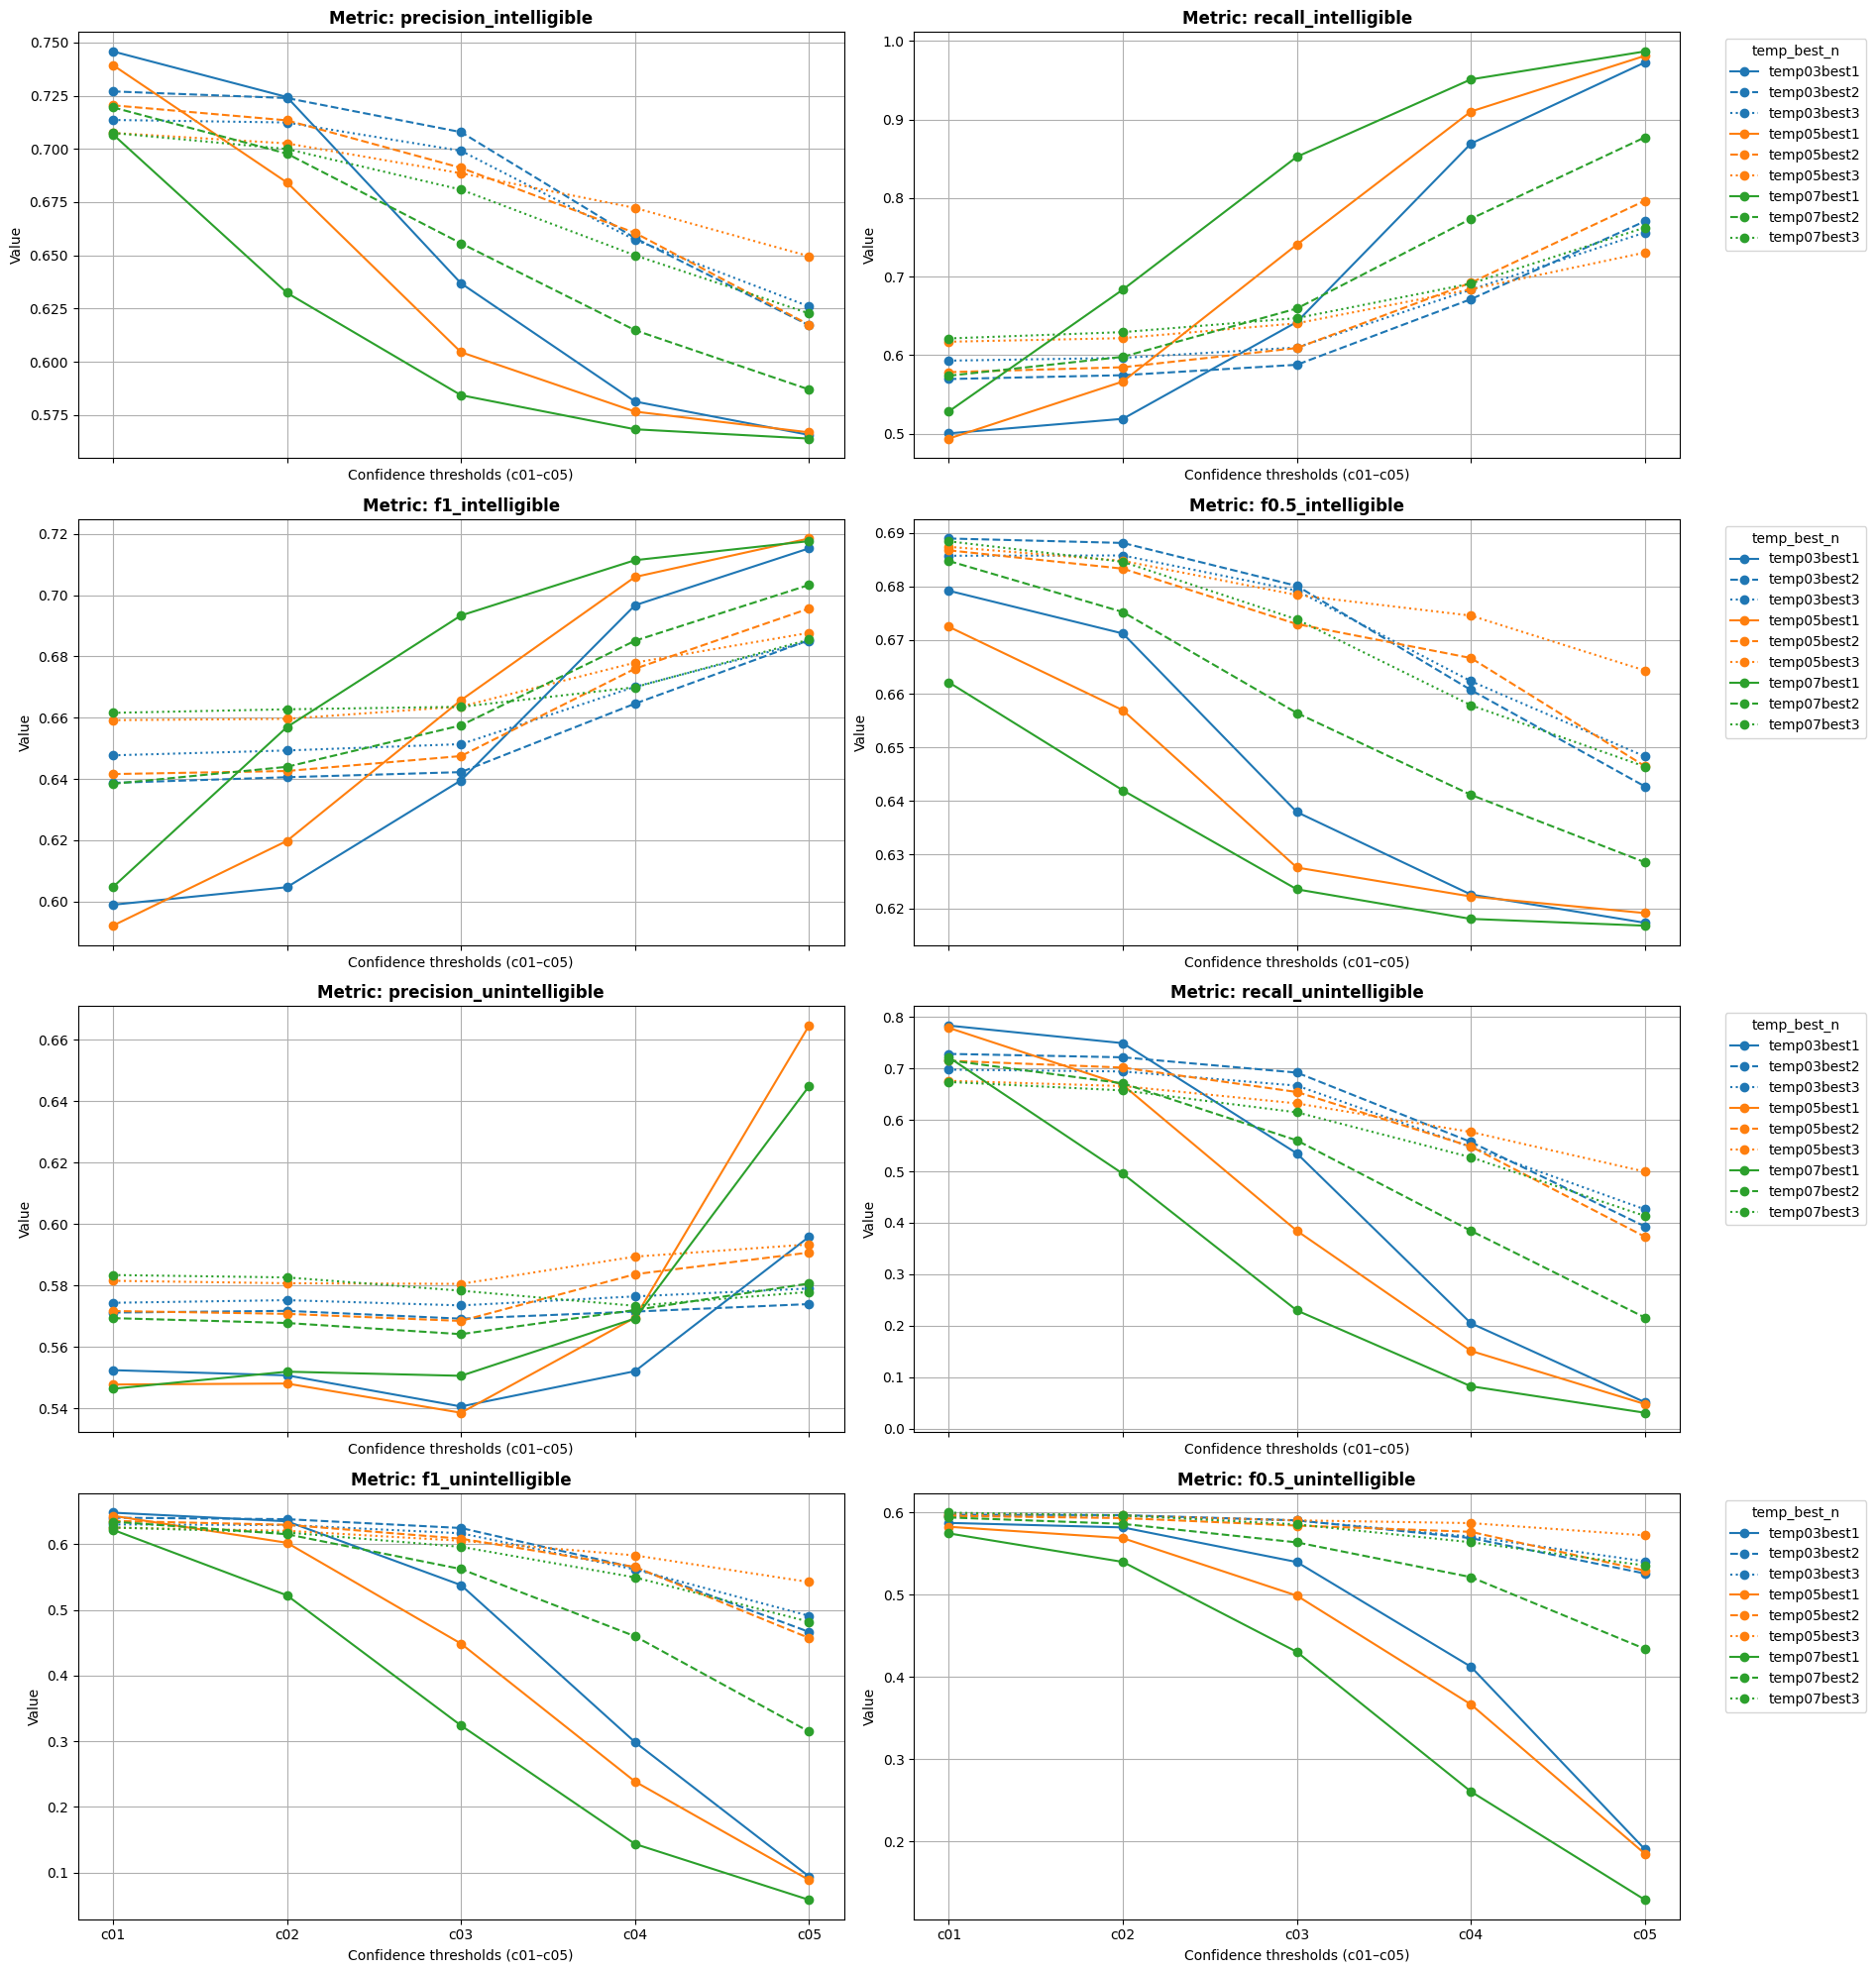

In [152]:
comb_show_lineplots(x03_05_07,'metrics_in_unintelligble', save_dir="graphs")

## To clearly see the changes between top2 and top 3, we used an adapted comb_show_lineplots

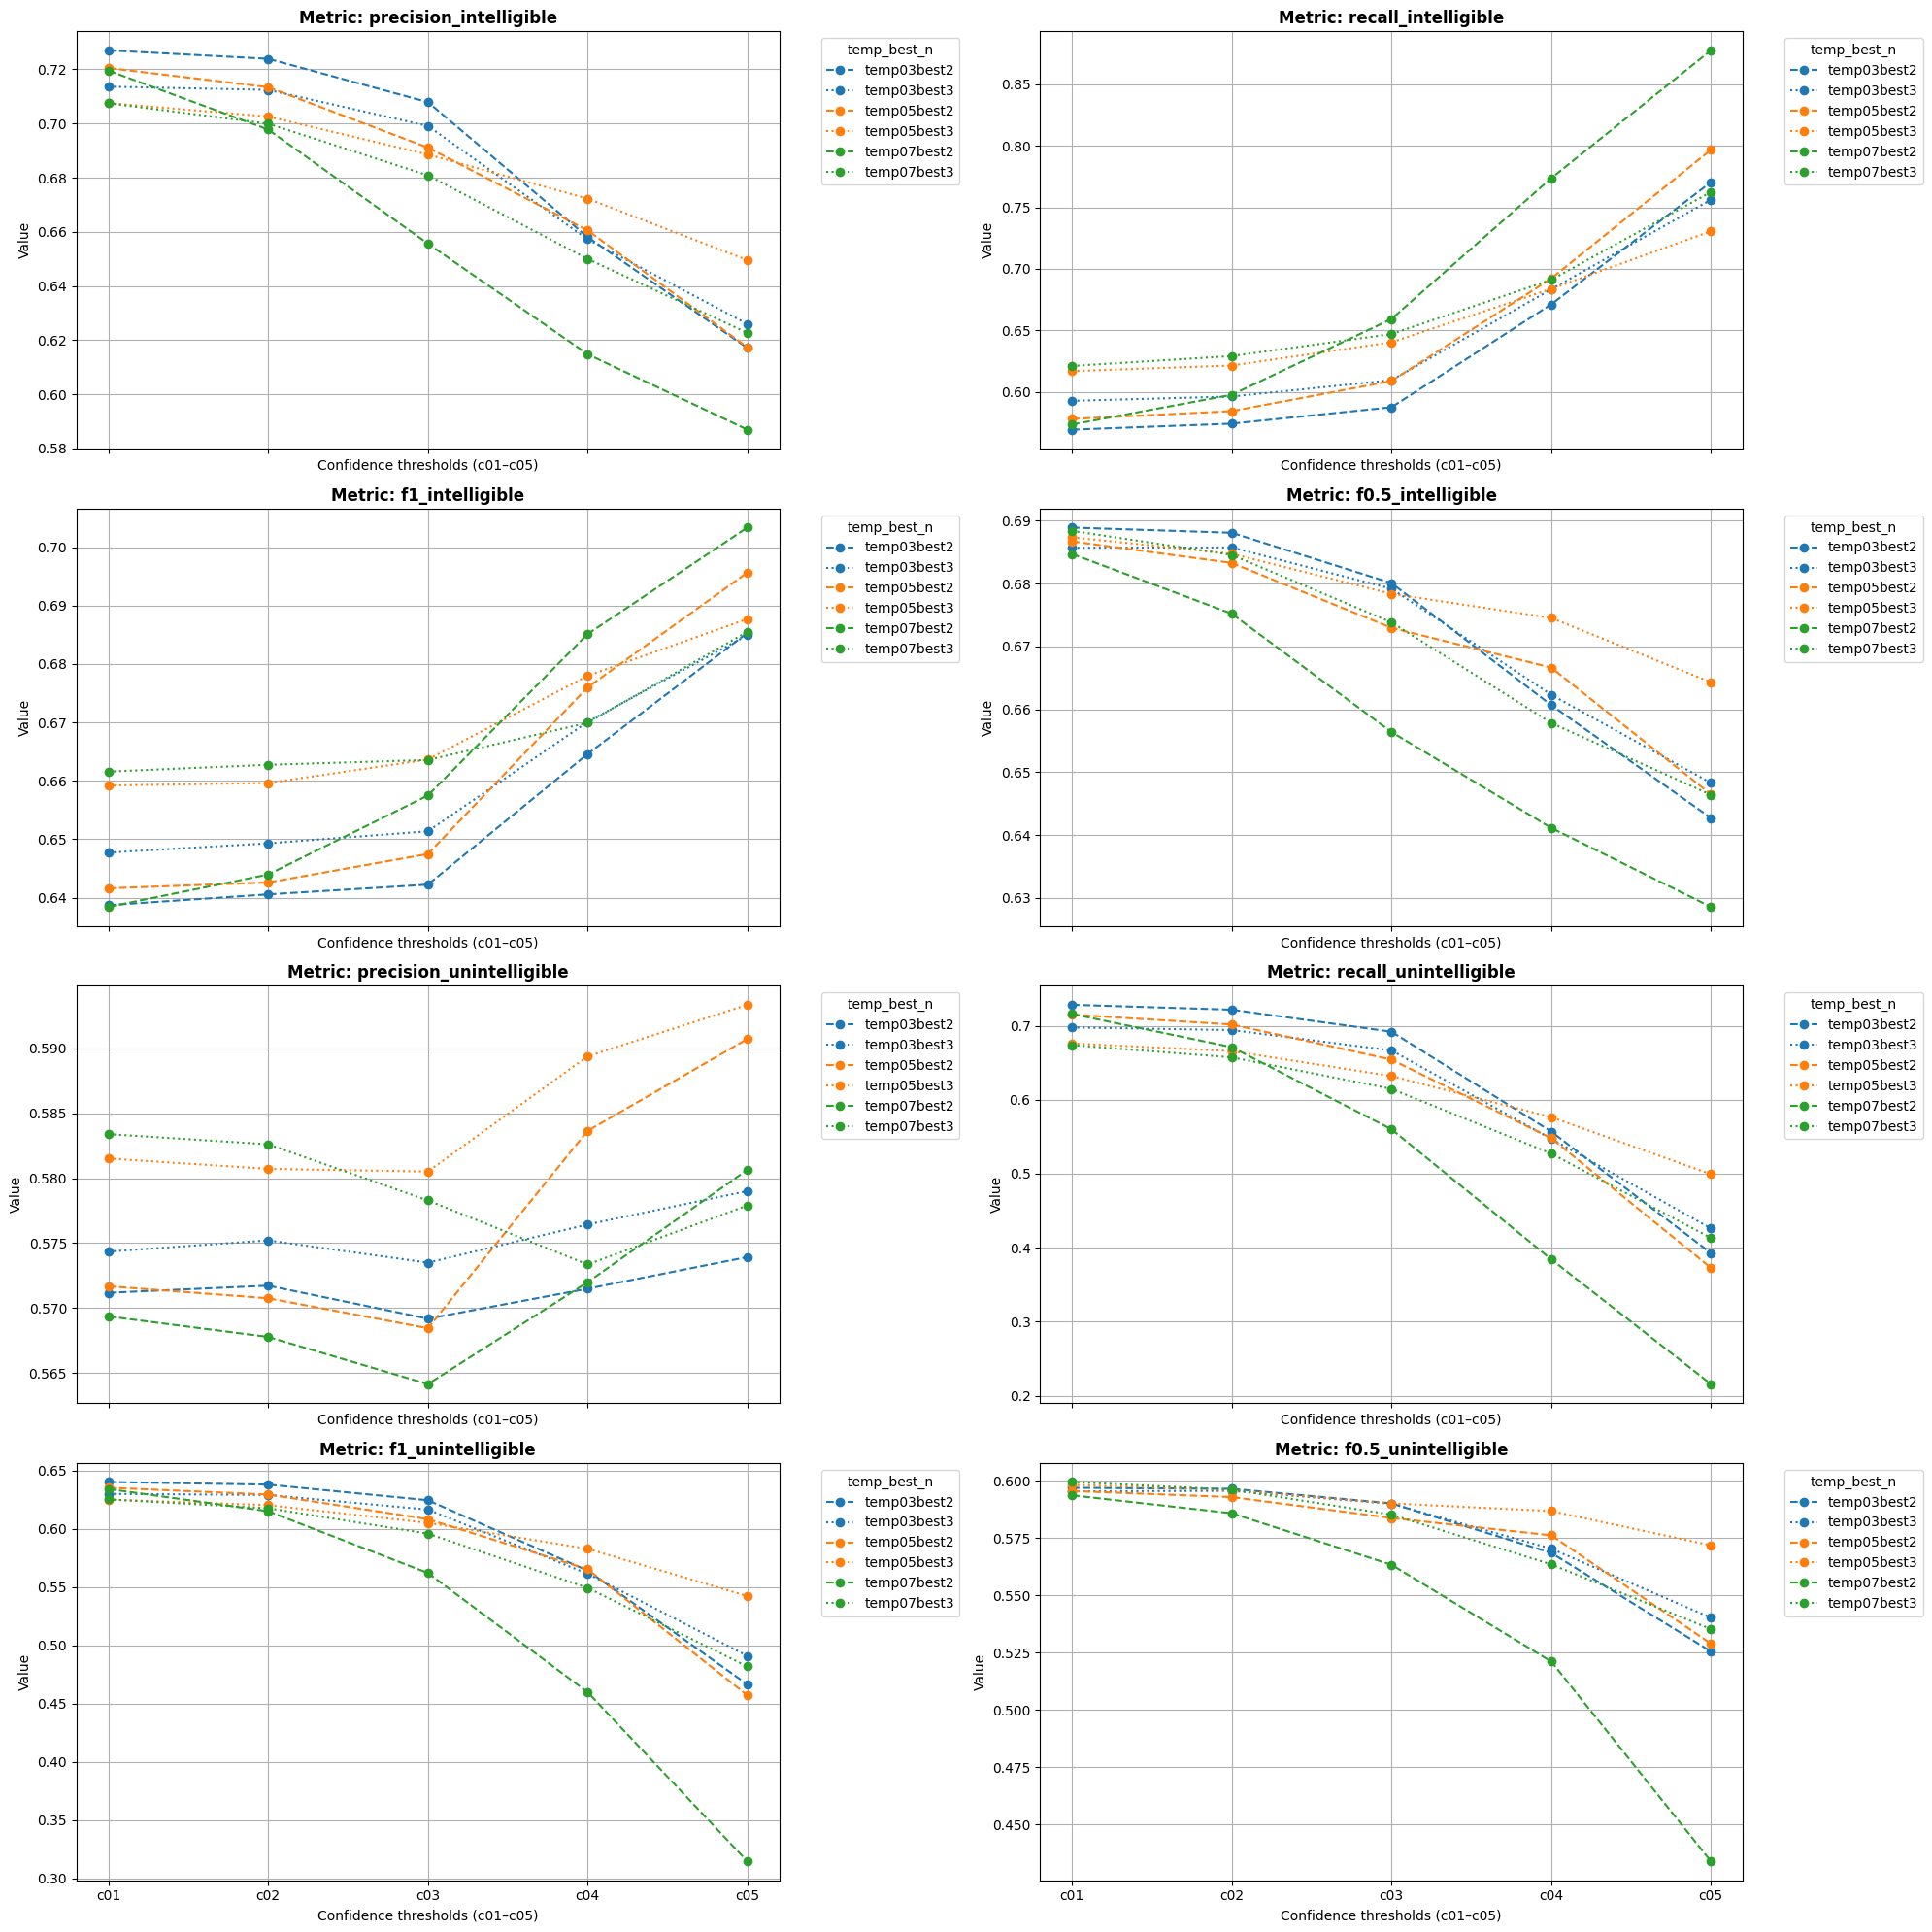

In [154]:
def adapted_comb_show_lineplots(data, filename, variants_to_plot=None):
    """
    Plot all metrics across conditions, temps, and variants.

    Args:
        data (list of dict): structured data with temps and metrics
        variants_to_plot (list of str): list of variant suffixes to include, e.g. ["top2", "top3"]
    """

    # Flatten into a dataframe
    records = []
    for entry in data:
        temp = entry["temp"]
        for m in entry["metrics"]:
            rec = m.copy()
            rec["temp"] = temp
            records.append(rec)

    df = pd.DataFrame(records)

    # Extract parts
    df["condition"] = df["number"].str.extract(r"(c\d+)")
    df["n_variant"] = df["number"].str.extract(r"(best\d+)")
    df["t_variant"] = df["temp"].apply(lambda x: f"temp{int(x*10):02d}")
    df["variant_full"] = df["t_variant"] + df["n_variant"]

    # Confidence labels
    df["confidence"] = df["condition"]

    # Filter only the variants we want
    if variants_to_plot is not None:
        df = df[df["n_variant"].isin(variants_to_plot)]

    # Consistent color/style maps
    palette = sns.color_palette(n_colors=df["t_variant"].nunique())
    dash_styles = ["solid", "dashed", "dotted", (0, (3, 1, 1, 1))]
    t_to_color = {t: palette[i] for i, t in enumerate(sorted(df["t_variant"].unique()))}

    n_to_dash = { "best2": "dashed", "best3": "dotted"} # We adapted the n_to_dash, so dashed is for top2, and dotted is for top3
    metrics = df["metric"].unique()
    num_metrics = len(metrics)

    # Layout grid
    ncols = 2
    nrows = math.ceil(num_metrics / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows), sharex=True)
    axes = axes.flatten()

    for ax, metric in zip(axes, metrics):
        sub = df[df["metric"] == metric]
        for v in sub["variant_full"].unique():
            temp = v[:6]
            n = v[6:]
            sub_v = sub[sub["variant_full"] == v]
            if not sub_v.empty:
                ax.plot(
                    sub_v["confidence"],
                    sub_v["value"],
                    label=v,
                    color=t_to_color[temp],
                    linestyle=n_to_dash[n],
                    marker="o"
                )

        ax.set_title(f"Metric: {metric}", fontweight="bold")
        ax.set_xlabel("Confidence thresholds (c01–c05)")
        ax.set_ylabel("Value")
        ax.set_xticks(["c01", "c02", "c03", "c04", "c05"])
        ax.grid(True)
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="temp_best_n")

    for ax in axes[num_metrics:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.savefig(f"./graphs/{filename}", bbox_inches='tight') 
    plt.show()
    plt.close()
adapted_comb_show_lineplots(x03_05_07, 'metrics_best2_3', variants_to_plot=["best2", "best3"])

### 4. the best result of each metrics with temperature, topn and confidence threshold values

In [59]:
best_metrics_results=[]
for temp, item in zip(['03','05','07'],[mapped_lst03_metrics_df,mapped_lst05_metrics_df,mapped_lst07_metrics_df]):
    result=best_metrics(item)
    result['temp']=temp
    best_metrics_results.append(result)
   
sorted_metrics = {}
for run in best_metrics_results:
    temp = run['temp']
    for metric, val in run.items():
        if metric == 'temp':
            continue
        number, score = val
        if metric not in sorted_metrics or score > sorted_metrics[metric][2]:
            sorted_metrics[metric] = (number, temp, score)
print(sorted_metrics)


{'f0.5_intelligible': ('c01top2', '03', 0.6889264581572273), 'f0.5_unintelligible': ('c01top3', '07', 0.5994787141615986), 'f1_intelligible': ('c05top1', '05', 0.7185261003070624), 'f1_unintelligible': ('c01top1', '03', 0.6479441997063142), 'precision_intelligible': ('c01top1', '03', 0.7458333333333333), 'precision_unintelligible': ('c05top1', '05', 0.6645962732919255), 'recall_intelligible': ('c05top1', '07', 0.986722571628232), 'recall_unintelligible': ('c01top1', '03', 0.7833999112294718)}


## Then we use the best configuration on test files

In [60]:
# using test files
# 1 provide the test path names for whisper at temp 0.7 and wav2vec
test_whisper07_output_json_file = "./tst_json_files/transcription_output/whisper_processed_output/test_whisper07_output.json"
test_multi_w2v_output_json_file_path = "./tst_json_files/transcription_output/w2v_processed_output/test_multi_w2v_output.json"

test_single_true_labels, test_true_cmuds, test_whisper07_judge_phonetic, test_w2v_judge_phonetic = two_model_intelligibility_labels(test_whisper07_output_json_file,test_multi_w2v_output_json_file_path)


In [61]:
print(type(test_true_cmuds))
print(test_true_cmuds[0])

<class 'list'>
P AO1 L


### We also want to see the distribution of hypotheses in w2v test file


In [62]:
test_w2v_multi_json = load_json(test_multi_w2v_output_json_file_path)
test_w2v_one_res, test_w2v_two_res, test_w2v_word_one_res, test_w2v_word_two_res = w2v_counting_one_two_results(test_w2v_multi_json)
print(f'{test_w2v_one_res} words have only one hypothesis')
print()
print(f'{test_w2v_two_res} words have two hypotheses')
print()
print(f'cases when w2v test file has one hypotheses: {test_w2v_word_one_res}')
print()
print(f'cases when w2v test file has two hypotheses: {test_w2v_word_two_res}')

4959
70 words have only one hypothesis

86 words have two hypotheses

cases when w2v test file has one hypotheses: ['bay', 'bee', 'bird', 'boy', 'boy', 'boy', 'boy', 'boy', 'boy', 'boy', 'boy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'city', 'dance', 'fair', 'farther', 'farther', 'farther', 'farther', 'farther', 'farther', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'father', 'fir', 'fir', 'fir', 'fur', 'fur', 'fur', 'half', 'knows', 'knows', 'pat', 'pat', 'pat', 'pat', 'pat', 'pet', 'pet', 'pit', 'pit', 'pit', 'pit', 'pot', 'pot', 'put', 'put', 'put', 'putt', 'putt', 'putt', 'putt', 'wait']

cases when w2v test file has two hypotheses: ['bear', 'bear', 'boot', 'boot', 'boot', 'boy', 'boy', 'boy', 'boy', 'boy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'city', 'cot', 'doll', 'fair', 'farther', 'farther', 'farther', 'farther', 'farther', 'farther', 'father', 'father', 'fat

In [63]:
## Obtain the list of true transcription 
def true_words_lst(json_file):
    content = load_json(json_file)
    word_list=[]
    for key, value in content.items():
        word_list.append(value['true_transcription'])
    return word_list

In [64]:
# obtaining the list of true transcription from test file of whisper at temperature 0.7
test_true_words_lst = true_words_lst(test_whisper07_output_json_file)

In [65]:
test_confidence_thresholds = 0.1

In [66]:
## adapting the results_at_confidence for error analysis
def error_analysis_results_at_confidence(confidence_thresholds, whisper_temp_phonetic, w2v_judge_phonetic,true_cmuds,true_labels):
    total_l = []    
    lst_top_1,lst_top_2,lst_top_3 = compare_make_three_lists(true_cmuds, whisper_temp_phonetic, w2v_judge_phonetic, confidence_thresholds)
    metrics_lst = [calculate_metrics(true_labels,i) for i in [lst_top_1,lst_top_2,lst_top_3]]
        
    return metrics_lst, lst_top_1,lst_top_2,lst_top_3 # lst_top_1, 2, 3 are respectively for top1, 2, 3 results

In [67]:
metrics_test, test_lst_top_1,test_lst_top_2,test_lst_top_3 = error_analysis_results_at_confidence(test_confidence_thresholds, test_whisper07_judge_phonetic,test_w2v_judge_phonetic, test_true_cmuds, test_single_true_labels)


In [68]:
for item in metrics_test:
    print(item)

{'precision_intelligible': 0.7234741784037558, 'recall_intelligible': 0.5363731291333101, 'f1_intelligible': 0.6160303817709374, 'f0.5_intelligible': 0.6762924602826297, 'precision_unintelligible': 0.5537688442211055, 'recall_unintelligible': 0.7372881355932204, 'f1_unintelligible': 0.6324851731394682, 'f0.5_unintelligible': 0.5827809899873078}
{'precision_intelligible': 0.7368421052631579, 'recall_intelligible': 0.5896275670031326, 'f1_intelligible': 0.6550657385924206, 'f0.5_intelligible': 0.7017979948628718, 'precision_unintelligible': 0.5813210227272727, 'recall_unintelligible': 0.7301516503122212, 'f1_unintelligible': 0.6472914195334124, 'f0.5_unintelligible': 0.6060269509847475}
{'precision_intelligible': 0.7261477045908183, 'recall_intelligible': 0.6331360946745562, 'f1_intelligible': 0.6764596504276682, 'f0.5_intelligible': 0.7054215465756611, 'precision_unintelligible': 0.5961685823754789, 'recall_unintelligible': 0.6940231935771632, 'f1_unintelligible': 0.6413849958779884, 'f

In [69]:
print_confusion_matrix(test_single_true_labels,test_lst_top_3)

Confusion Matrix:
               Predicted Intelligible     Predicted Unintelligible
Actual Intelligible        1819            1054           
Actual Unintelligible      686             1556           


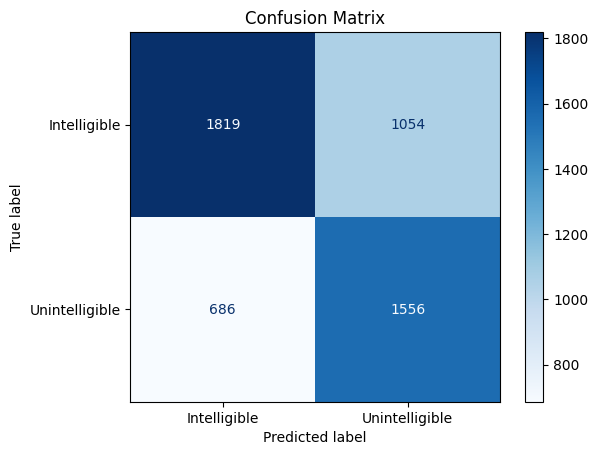

In [136]:
def confusion_matrix_print(a, b, filename):
    a = np.array(a)
    b = np.array(b)

    a = np.char.lower(a.astype(str))
    b = np.char.lower(b.astype(str))
    label_map = {
        'unintelligible': 'Unintelligible',
        'intelligible': 'Intelligible'
    }

    a_labels = [label_map[x] for x in a]
    b_labels = [label_map[x] for x in b]

    unique_labels = np.unique(np.concatenate((a_labels, b_labels)))

    cm = confusion_matrix(a_labels, b_labels, labels=unique_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    disp.plot(cmap='Blues', values_format='d')

    plt.title("Confusion Matrix")
    plt.savefig(f"./graphs/{filename}", bbox_inches='tight')
    plt.show()
    plt.close()

confusion_matrix_print(test_single_true_labels,test_lst_top_3, 'confusion_matrix_test')
    

In [130]:
print(test_single_true_labels[0:2])

['unintelligible', 'unintelligible']


In [71]:
# the metrics for the best-performing configuration can be obtained by the following way, or using the index_2 of the metrics_test
calculate_metrics(test_single_true_labels,test_lst_top_3)

{'precision_intelligible': 0.7261477045908183,
 'recall_intelligible': 0.6331360946745562,
 'f1_intelligible': 0.6764596504276682,
 'f0.5_intelligible': 0.7054215465756611,
 'precision_unintelligible': 0.5961685823754789,
 'recall_unintelligible': 0.6940231935771632,
 'f1_unintelligible': 0.6413849958779884,
 'f0.5_unintelligible': 0.6134679072701467}

## Below we are conducting error analysis starting from metrics per word

In [122]:
# obtaining the metrics per word
def metrics_per_word(true_words_lst, test_lst_top_n,test_single_true_labels):
    unique_names = list(dict.fromkeys(true_words_lst))
    metrics_list = []   
    count_list = []
    for word in unique_names:
        word_count = 0
        word_true_labels = []
        word_model_labels = []
        for true_word, model_label, true_label in zip(true_words_lst, test_lst_top_n, test_single_true_labels):       
            if true_word == word:            
                word_true_labels.append(true_label)
                word_model_labels.append(model_label)
                word_count += 1
        count_list.append(word_count)
        word_metrics = calculate_metrics(word_true_labels,word_model_labels)
        metrics_list.append((word, word_metrics))      
        
    return metrics_list, count_list

In [73]:
res_metrics_word, res_countlist = metrics_per_word(test_true_words_lst, test_lst_top_3,test_single_true_labels)
print(res_countlist) # the numbers of each unique word
test_unique_names = list(dict.fromkeys(test_true_words_lst)) # unique words
print(test_unique_names) 
print(len(test_unique_names)) # how many unique words

[98, 99, 101, 99, 100, 99, 98, 95, 101, 100, 99, 100, 100, 99, 98, 98, 101, 98, 99, 97, 100, 102, 97, 98, 99, 99, 99, 96, 95, 95, 96, 97, 100, 96, 99, 94, 101, 100, 46, 98, 101, 97, 96, 100, 97, 96, 100, 99, 99, 96, 97, 54, 97]
['Paul', 'bard', 'bay', 'bear', 'bee', 'beer', 'bird', 'board', 'boat', 'boot', 'bout', 'boy', 'buy', 'caught', 'city', 'cot', 'daft', 'dance', 'doll', 'fair', 'farther', 'father', 'fern', 'fir', 'fur', 'half', 'hat', 'knows', 'mate', 'meat', 'meet', 'nose', 'pat', 'pause', 'paw', 'paws', 'pet', 'pit', 'plate', 'pole', 'pool', 'poor', 'pore', 'pot', 'pour', 'pull', 'put', 'putt', 'seedy', 'tide', 'tied', 'wait', 'weight']
53


/Users/marlowzhao/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
# inspecting
for i, single_word_metrics in enumerate(res_metrics_word):
    if i <= 5:
        print(single_word_metrics)

('Paul', {'precision_intelligible': 0.425531914893617, 'recall_intelligible': 0.5263157894736842, 'f1_intelligible': 0.4705882352941176, 'f0.5_intelligible': 0.44247787610619466, 'precision_unintelligible': 0.6470588235294118, 'recall_unintelligible': 0.55, 'f1_unintelligible': 0.5945945945945946, 'f0.5_unintelligible': 0.625})
('bard', {'precision_intelligible': 0.5, 'recall_intelligible': 0.5333333333333333, 'f1_intelligible': 0.5161290322580646, 'f0.5_intelligible': 0.5063291139240506, 'precision_unintelligible': 0.7910447761194029, 'recall_unintelligible': 0.7681159420289855, 'f1_unintelligible': 0.7794117647058824, 'f0.5_unintelligible': 0.7863501483679525})
('bay', {'precision_intelligible': 0.8888888888888888, 'recall_intelligible': 0.6588235294117647, 'f1_intelligible': 0.7567567567567567, 'f0.5_intelligible': 0.8308605341246291, 'precision_unintelligible': 0.23684210526315788, 'recall_unintelligible': 0.5625, 'f1_unintelligible': 0.3333333333333333, 'f0.5_unintelligible': 0.26

In [75]:
# this function takes a metric, e.g 'precision_intelligible', and results of metrics per word, and turn out a dictionary consisting of word: metric_value
def metrics_to_visualise(metric,results_metrics_per_word):
    ranked = sorted(
        results_metrics_per_word,
        key=lambda x: x[1][f'{metric}'],
        reverse=True
    )
    dict_metrics={}
    for word, metrics in ranked:
        dict_metrics[word] = metrics[f'{metric}']
    return dict_metrics


In [76]:
# this function takes data of diction of (word: metric_value) and metric_name, and turns out visualisation of ranked word: metric value 
def show_quartile_vertical(data, metric):
    df = pd.DataFrame(list(data.items()), columns=["word", "score"])    # Convert dict → DataFrame
    df["group"] = pd.qcut(
        df["score"], 4,
        labels=["25%", "26-50%", "51-75%", "76-100%"]
    )
    df_sorted = df.sort_values("score", ascending=True)

    plt.figure(figsize=(18, 6))
    ax = sns.barplot(
        data=df_sorted,
        x="word",
        y="score",
        hue="group",
        dodge=False,
        palette="RdYlGn"
    )

    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3, fontsize=9)

    plt.title(f"Per Word Value by {metric}", fontsize=14)
    plt.xlabel("Word")
    plt.ylabel("Metric Value")
    plt.xticks(rotation=90)
    plt.legend(title="Value Groups", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig(f"./graphs/{metric}", bbox_inches='tight') 
    plt.show()
    plt.close()


In [77]:
# preparing the diction form of each metric by word
dict_precision_intelligible = metrics_to_visualise('precision_intelligible',res_metrics_word)
dict_recall_intelligible = metrics_to_visualise('recall_intelligible',res_metrics_word)
dict_F05_intelligible = metrics_to_visualise('f0.5_intelligible',res_metrics_word)

dict_precision_unintelligible = metrics_to_visualise('precision_unintelligible',res_metrics_word)
dict_recall_unintelligible = metrics_to_visualise('recall_unintelligible',res_metrics_word)
dict_F05_unintelligible = metrics_to_visualise('f0.5_unintelligible',res_metrics_word)


In [78]:
def per_word_label_distribution(word, w2v_multi_json):
    count_in = 0
    count_un = 0
    for key, value in w2v_multi_json.items(): 
        if value['true_transcription'] == word and value['trueLabel'] == 'intelligible':
            count_in += 1
        if value['true_transcription'] == word and value['trueLabel'] == 'unintelligible':
            count_un += 1
    return count_in, count_un
#print(dict_precision_unintelligible)
def align_list_with_ranked_metrics(dict_metric_intelligibility, w2v_multi_json):
    sorted_dict_d = dict(sorted(dict_metric_intelligibility.items(), key=lambda item: item[1]))
    sorted_word_lst = []
    for key, values in sorted_dict_d.items():
        sorted_word_lst.append(key)
    #return lst_dddd
    word_distribute_intelligibility = []
    for word in sorted_word_lst:
        dict_tem={}
        x, y = per_word_label_distribution(word, w2v_multi_json)
        dict_tem[word]={'intel': x, 'unintel': y}
        word_distribute_intelligibility.append(dict_tem)
    return word_distribute_intelligibility
# CALLING precision_unintelligible
distrib_perword_precision_un = align_list_with_ranked_metrics(dict_precision_unintelligible, test_w2v_multi_json)
# CALLING recal_unintelligible
distrib_perword_recall_un = align_list_with_ranked_metrics(dict_recall_unintelligible, test_w2v_multi_json)
# CALLING precision_intelligible
distrib_perword_precision_in = align_list_with_ranked_metrics(dict_precision_intelligible, test_w2v_multi_json)
# CALLING recal_intelligible
distrib_perword_recall_in = align_list_with_ranked_metrics(dict_recall_intelligible, test_w2v_multi_json)

In [79]:
print(distrib_perword_precision_un)
#print(distrib_perword_recall_un)

[{'buy': {'intel': 83, 'unintel': 17}}, {'bee': {'intel': 88, 'unintel': 12}}, {'hat': {'intel': 86, 'unintel': 13}}, {'pet': {'intel': 81, 'unintel': 20}}, {'bay': {'intel': 85, 'unintel': 16}}, {'boy': {'intel': 86, 'unintel': 14}}, {'daft': {'intel': 72, 'unintel': 29}}, {'wait': {'intel': 46, 'unintel': 8}}, {'cot': {'intel': 64, 'unintel': 34}}, {'dance': {'intel': 74, 'unintel': 24}}, {'pit': {'intel': 67, 'unintel': 33}}, {'meet': {'intel': 76, 'unintel': 20}}, {'pat': {'intel': 67, 'unintel': 33}}, {'pot': {'intel': 69, 'unintel': 31}}, {'boot': {'intel': 67, 'unintel': 33}}, {'put': {'intel': 67, 'unintel': 33}}, {'fern': {'intel': 57, 'unintel': 40}}, {'half': {'intel': 65, 'unintel': 34}}, {'nose': {'intel': 78, 'unintel': 19}}, {'pore': {'intel': 53, 'unintel': 43}}, {'doll': {'intel': 57, 'unintel': 42}}, {'mate': {'intel': 70, 'unintel': 25}}, {'city': {'intel': 67, 'unintel': 31}}, {'boat': {'intel': 62, 'unintel': 39}}, {'bout': {'intel': 50, 'unintel': 49}}, {'pull': {

In [80]:
def visualise_distribute_by_metric(data, metric):
    df = pd.DataFrame([
        {'word': list(item.keys())[0],
         'intel': list(item.values())[0]['intel'],
         'unintel': list(item.values())[0]['unintel']}
        for item in data
    ])

    ax = df.plot(
        x='word',
        kind='bar',
        stacked=True,
        figsize=(15, 6),
        ylabel='Count',
        xlabel='Word',
        title=f'Intelligible vs Unintelligible Labels {metric}'
    )

    # Add value labels
    for container in ax.containers:
        # Optional: only label bars that are visible
        ax.bar_label(container, fmt='%d', label_type='center', fontsize=8, color='black')

    plt.tight_layout()
    plt.savefig(f"./graphs/{metric}", bbox_inches='tight')
    plt.show()
    plt.close()

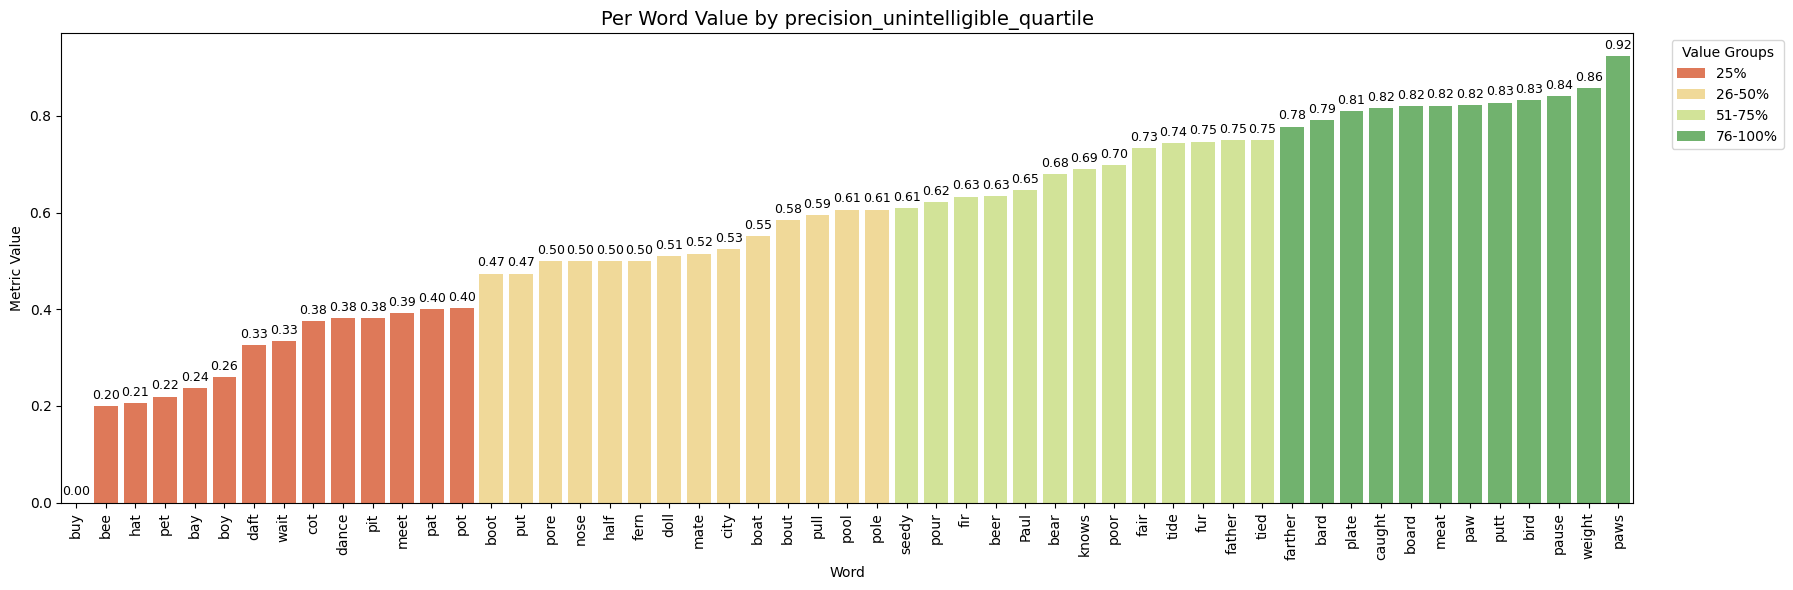

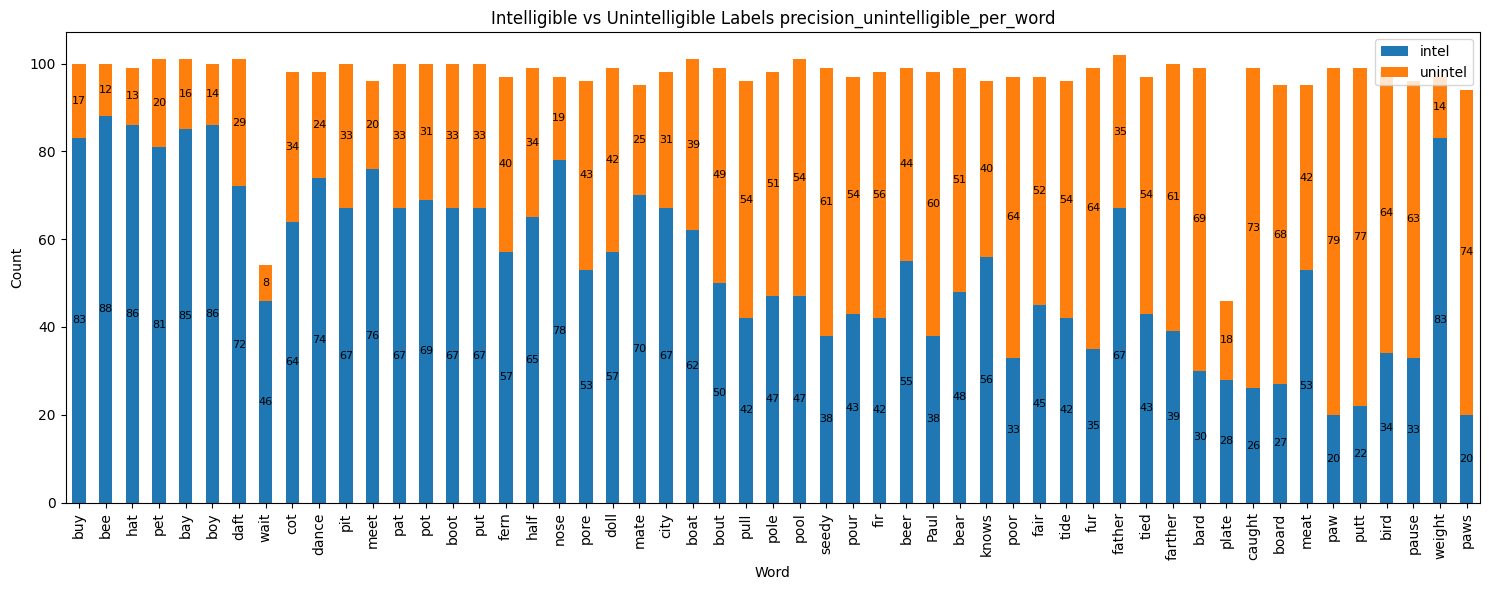

In [81]:
show_quartile_vertical(dict_precision_unintelligible,'precision_unintelligible_quartile')
visualise_distribute_by_metric(distrib_perword_precision_un, 'precision_unintelligible_per_word')

### Here, to see the distribution of data in the dev dataset, w2v_multi_json is the dev dataset results for wav2vec; we still use the dict_precision_unintelligibe because we only have to align the word distribution according to the test data result

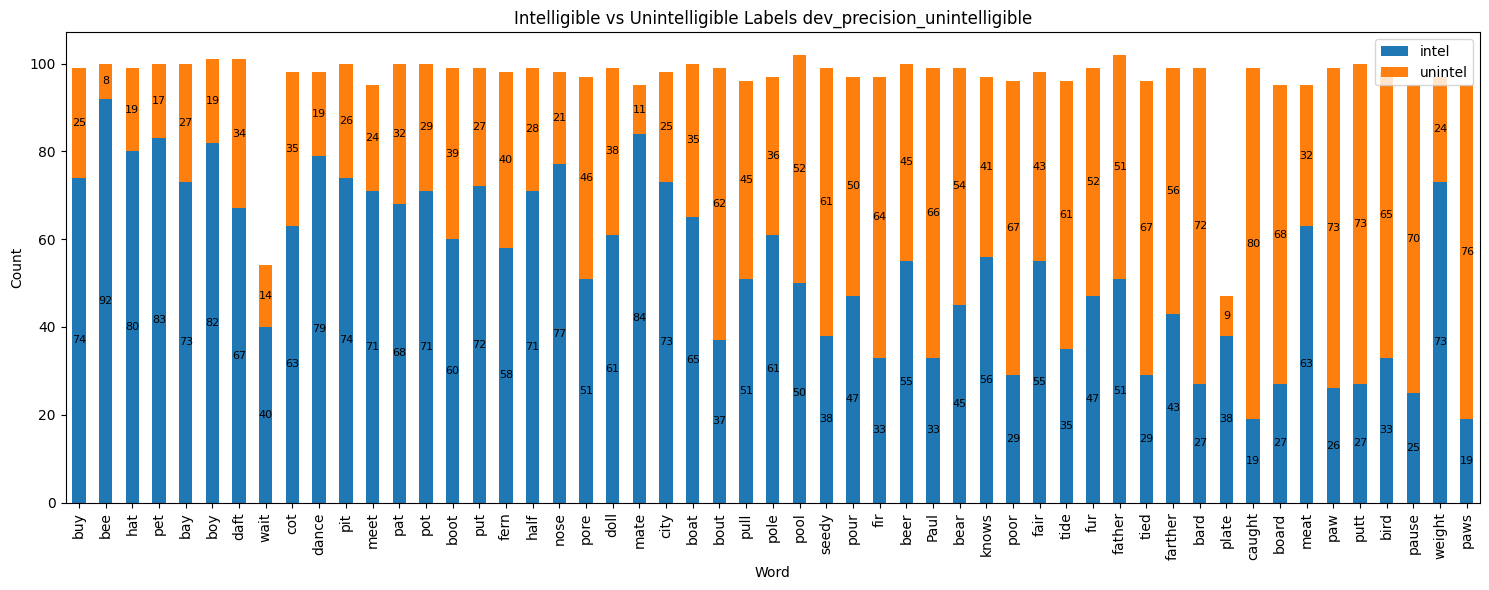

In [82]:

dev_distrib_perword_precision_un = align_list_with_ranked_metrics(dict_precision_unintelligible, w2v_multi_json)
visualise_distribute_by_metric(dev_distrib_perword_precision_un, 'dev_precision_unintelligible')


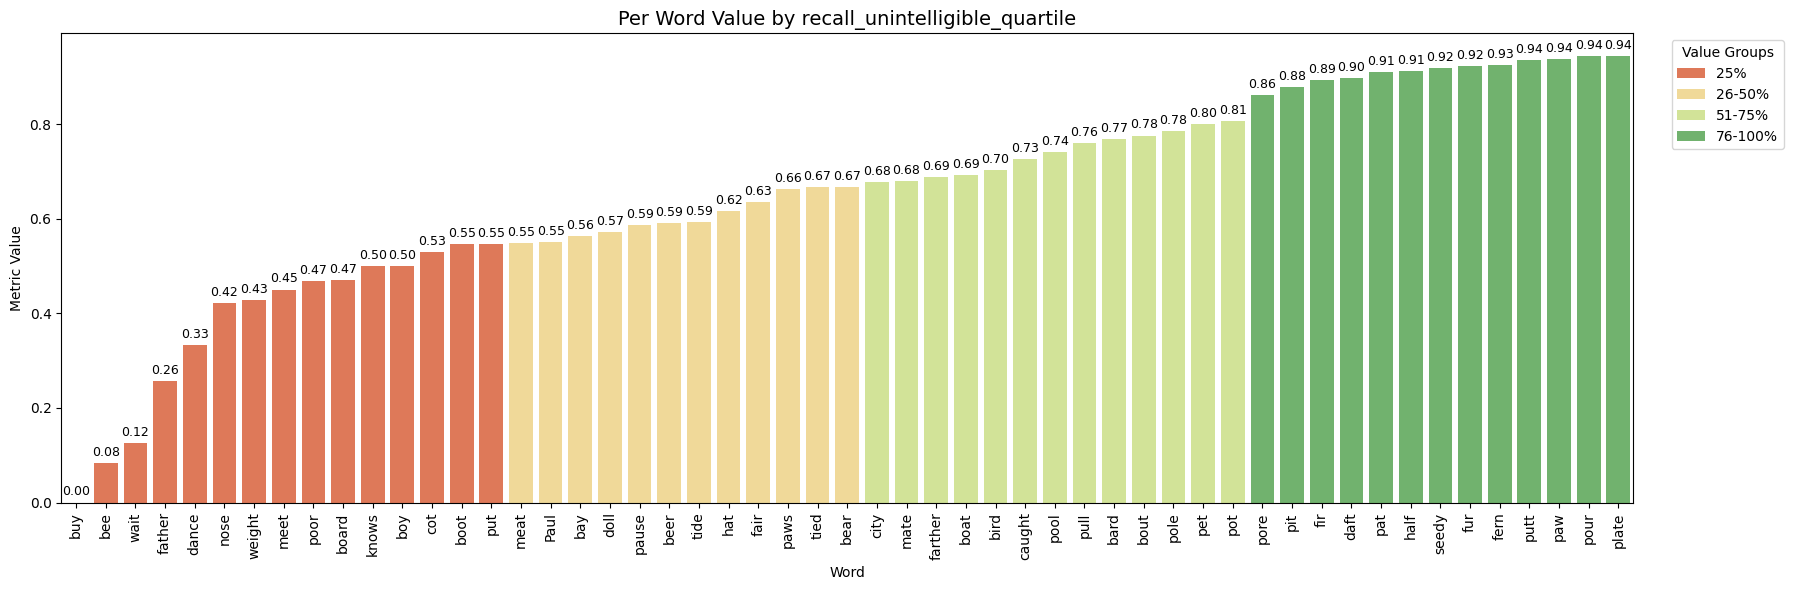

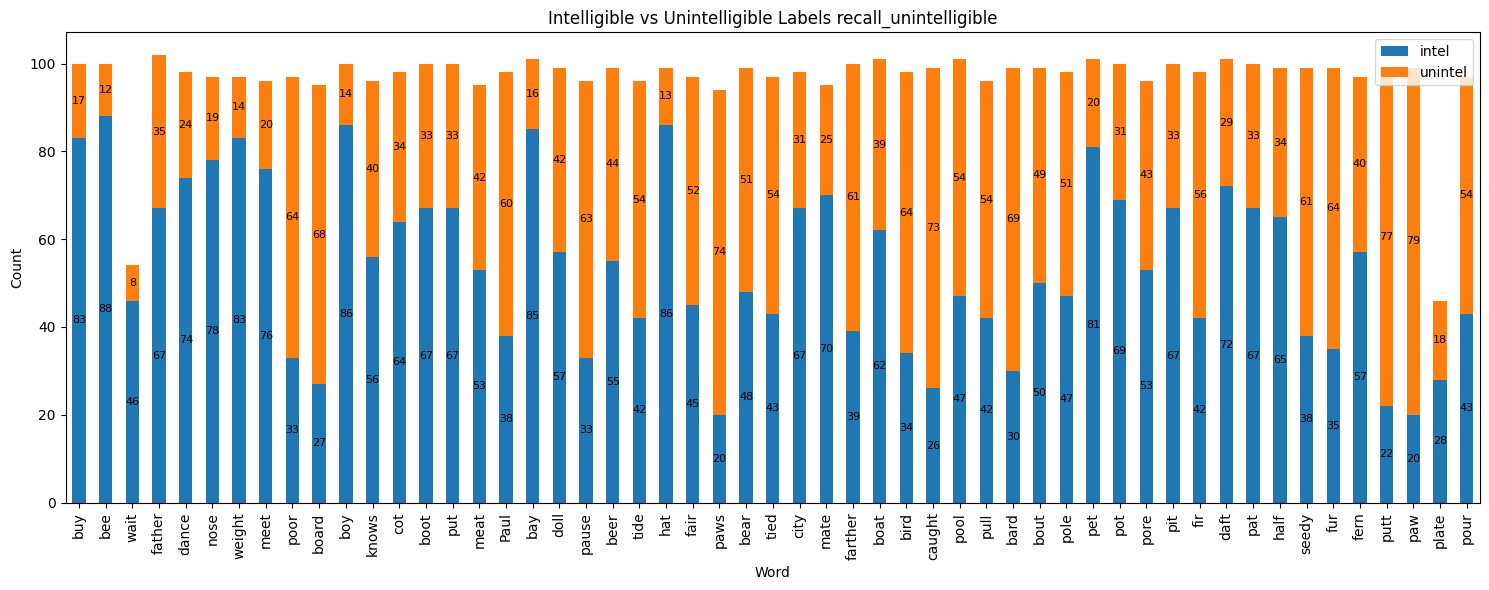

In [83]:
show_quartile_vertical(dict_recall_unintelligible,'recall_unintelligible_quartile')
visualise_distribute_by_metric(distrib_perword_recall_un, 'recall_unintelligible')

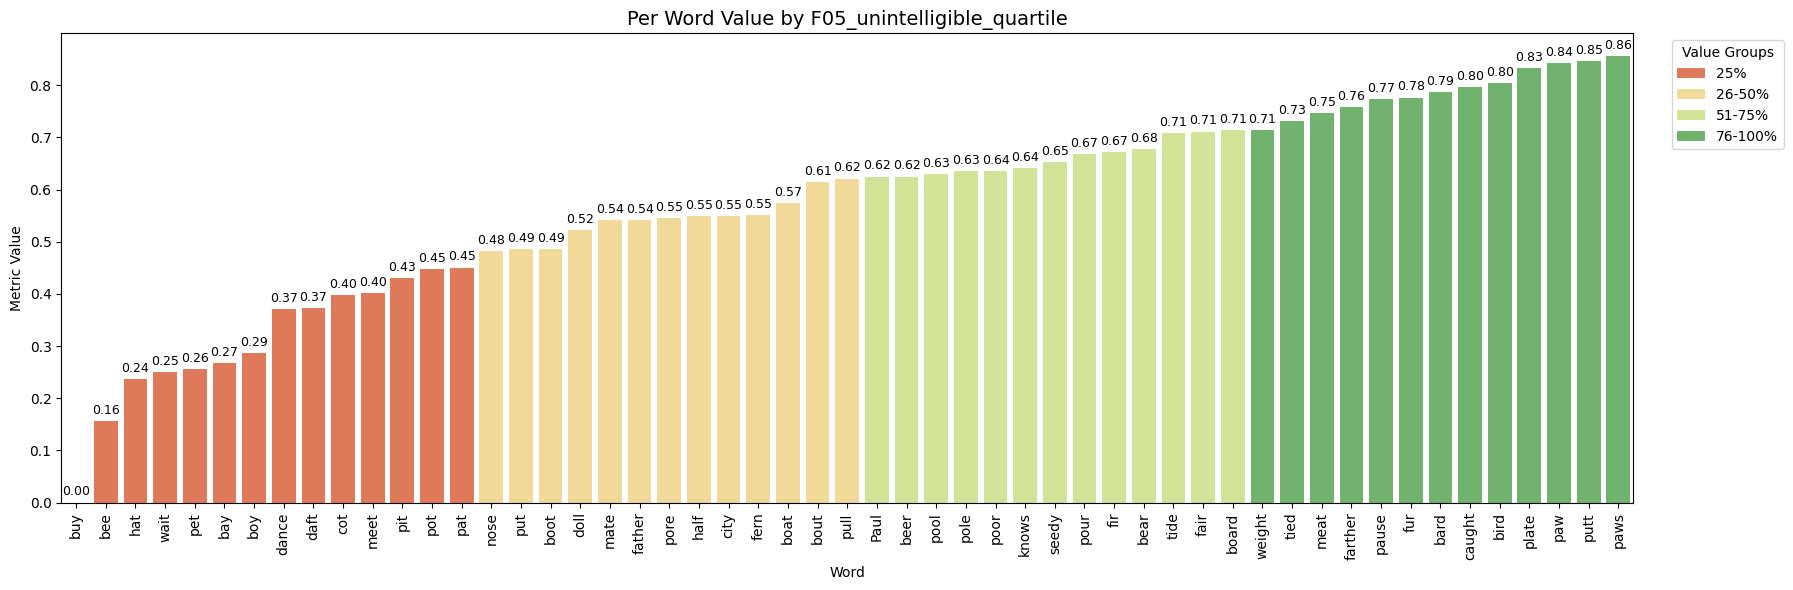

In [84]:
show_quartile_vertical(dict_F05_unintelligible,'F05_unintelligible_quartile')

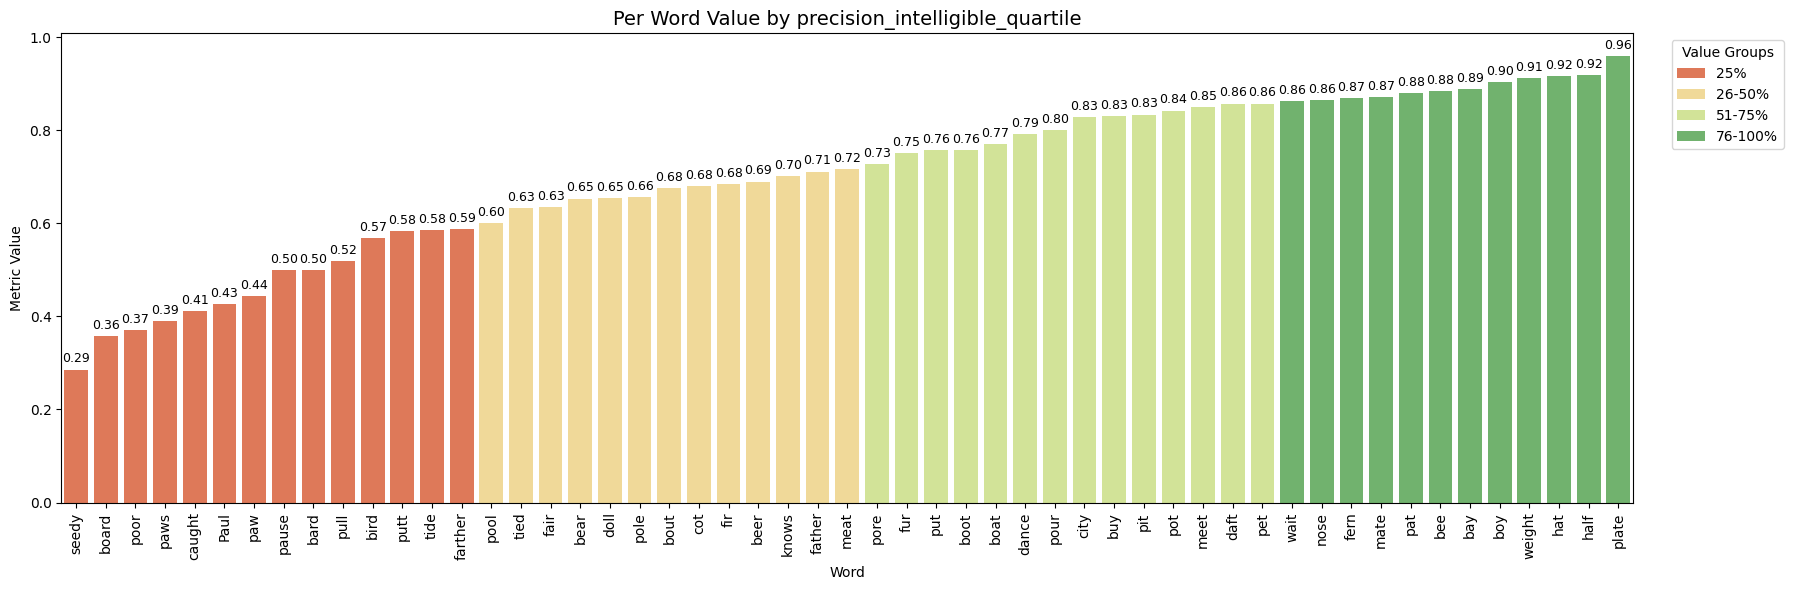

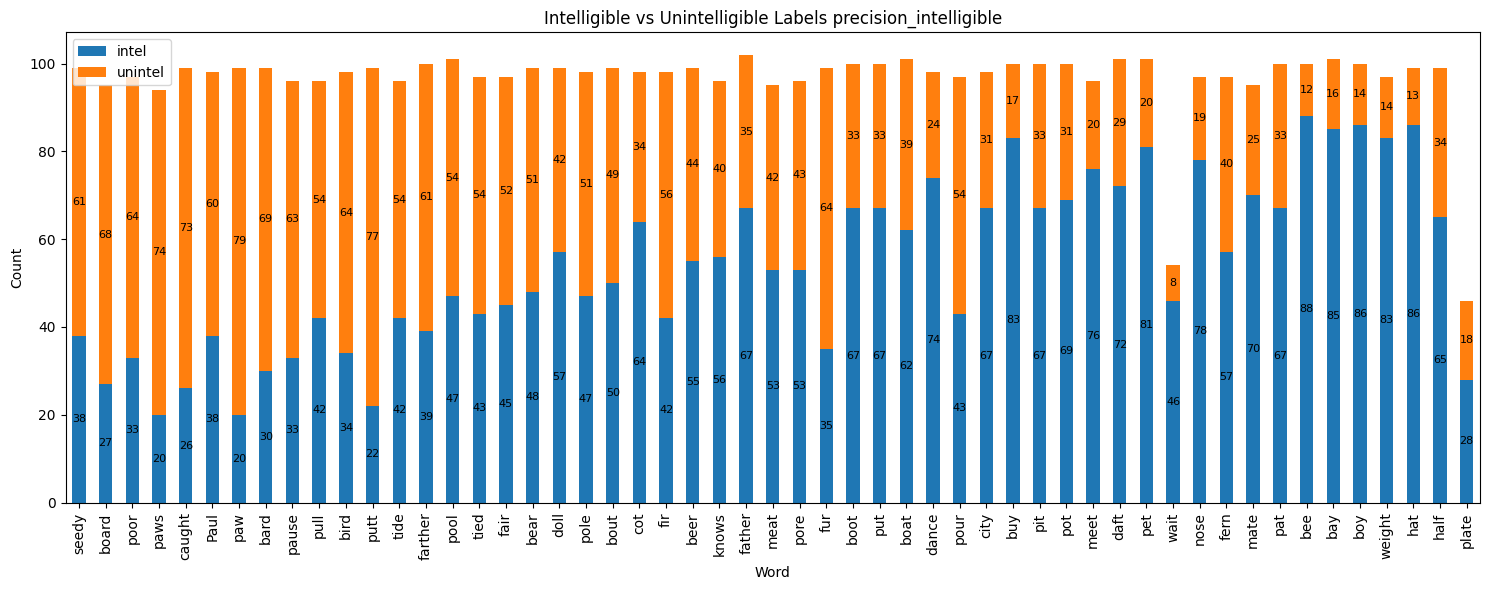

In [85]:
## show recall intelligible by word
show_quartile_vertical(dict_precision_intelligible, 'precision_intelligible_quartile')
visualise_distribute_by_metric(distrib_perword_precision_in, 'precision_intelligible')

### Here to see the distribution of data in the dev dataset, w2v_multi_json is the dev dataset results for wav2vec; we still use the dict_precision_intelligibe because we only have to align the word distribution according to the test data result

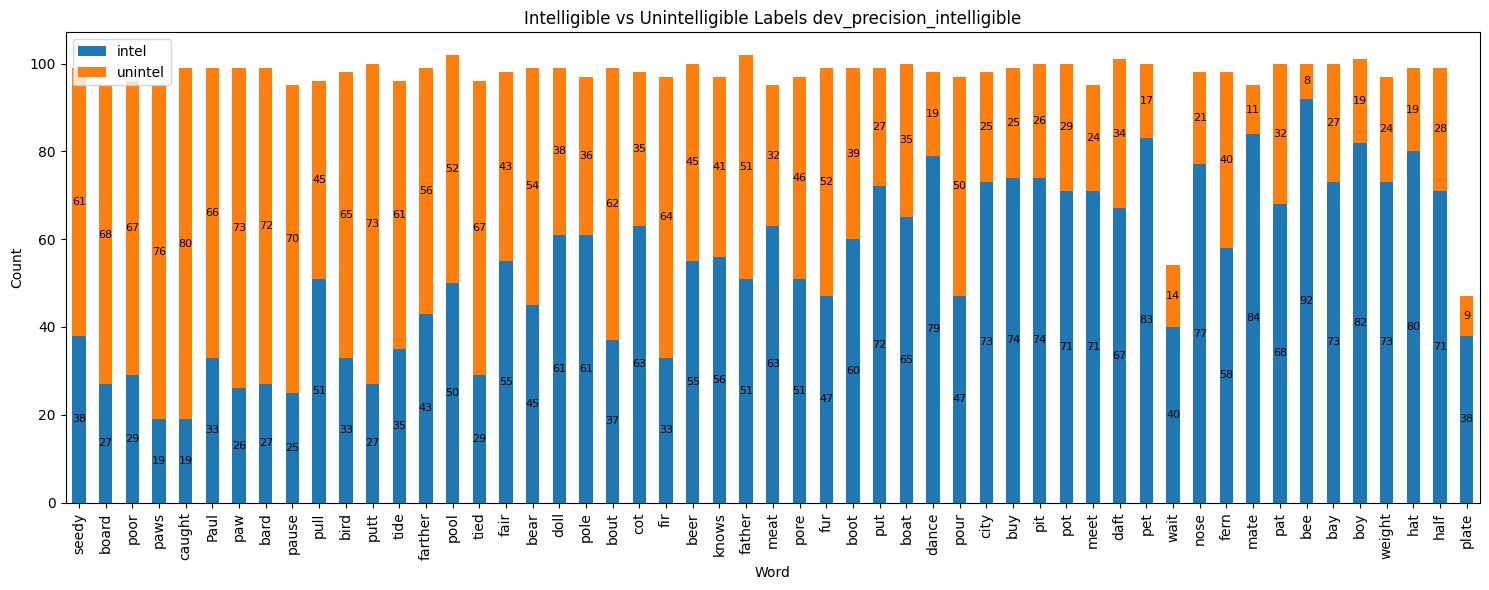

In [86]:
dev_distrib_perword_precision_intelligible = align_list_with_ranked_metrics(dict_precision_intelligible, w2v_multi_json)
visualise_distribute_by_metric(dev_distrib_perword_precision_intelligible, 'dev_precision_intelligible')


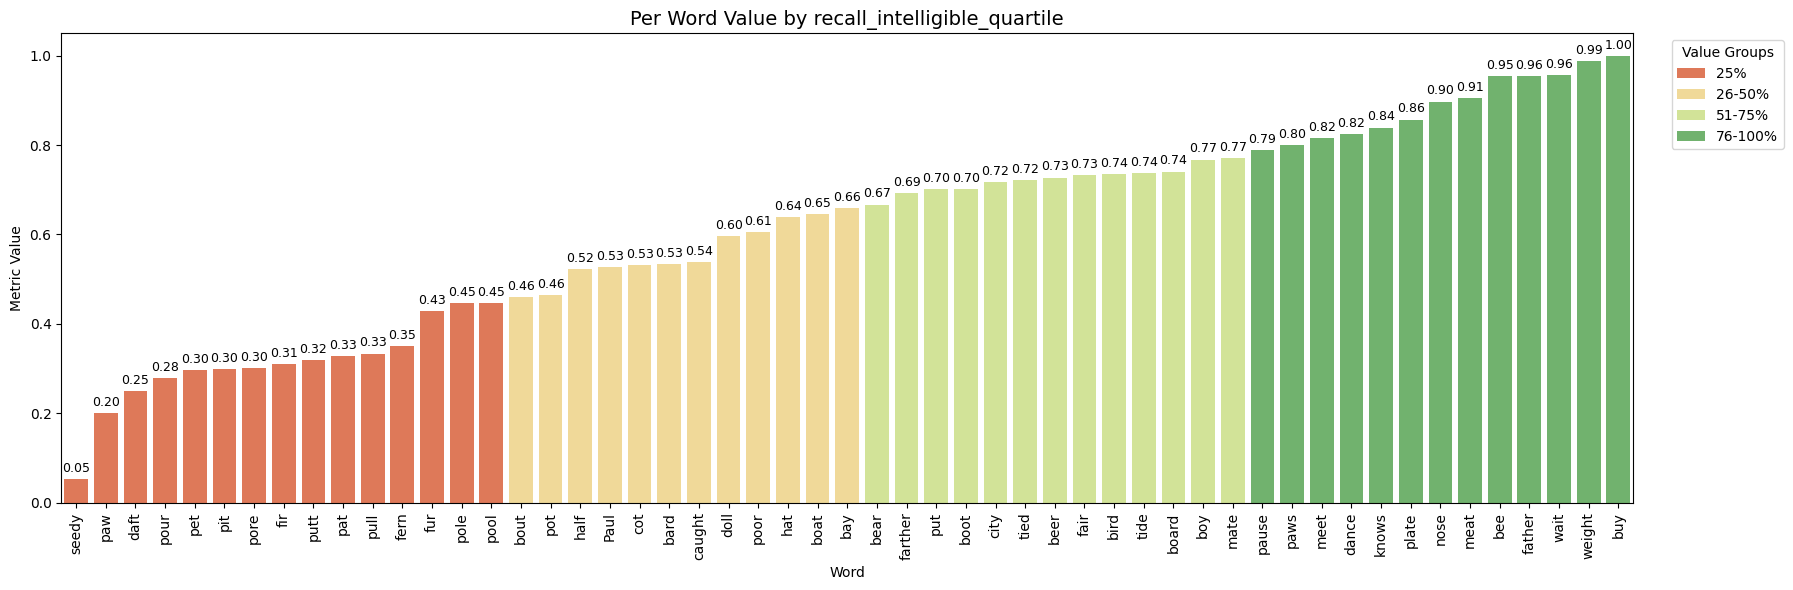

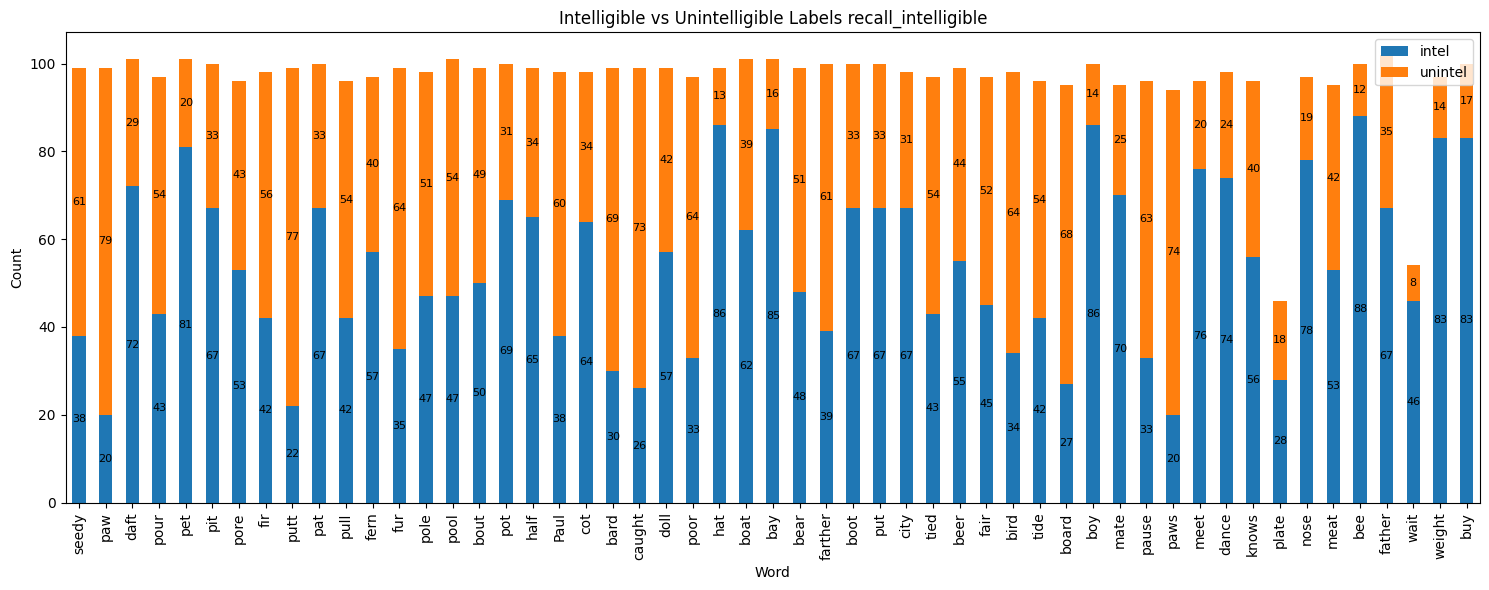

In [87]:
show_quartile_vertical(dict_recall_intelligible,'recall_intelligible_quartile')
visualise_distribute_by_metric(distrib_perword_recall_in,'recall_intelligible')

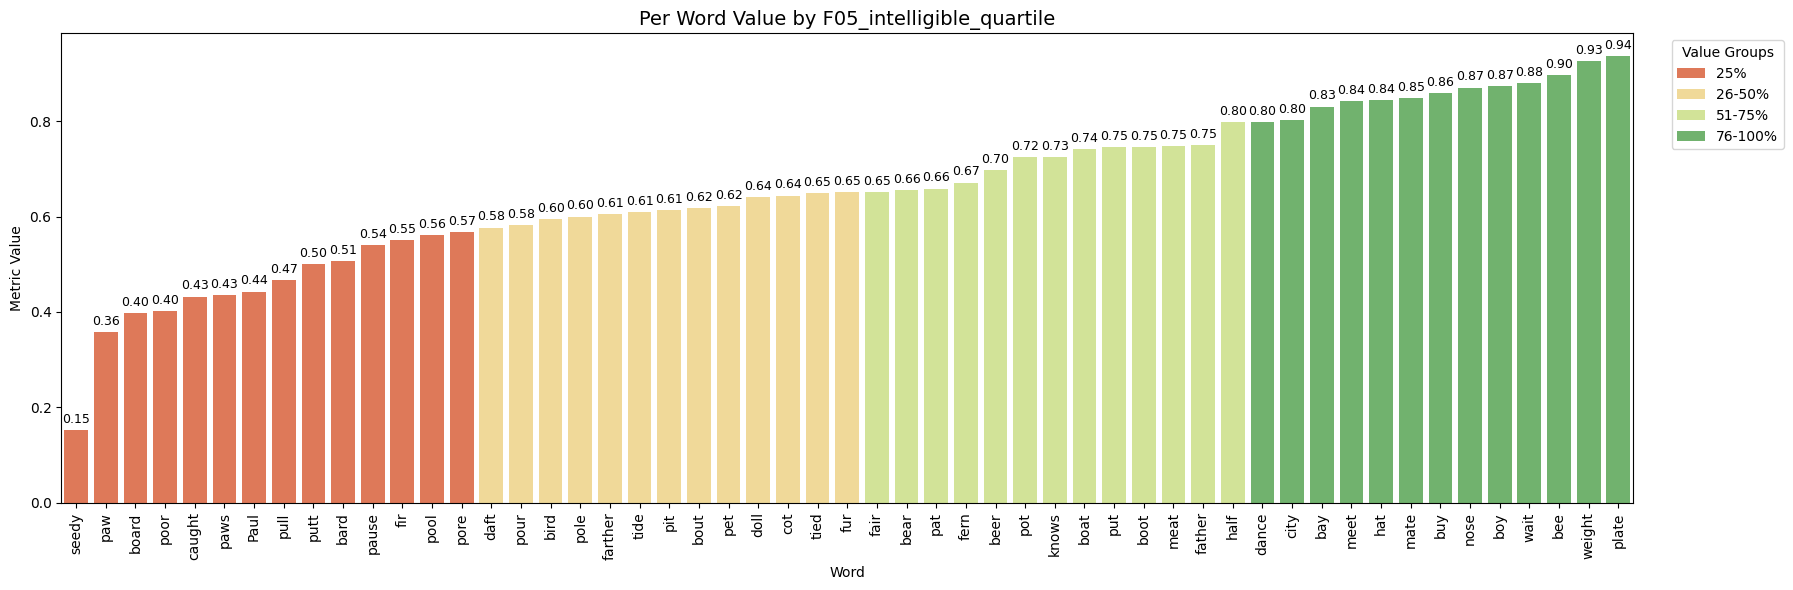

In [88]:
show_quartile_vertical(dict_F05_intelligible,'F05_intelligible_quartile')

### Here we use a json to store information for true_transcription, true_CMUD, true_intelligiblity_label,model_intelligibility_label, transcriptions of two models, CMUD of two models, type of TP/FP/TN/FN

In [89]:
#### Here we use a json to store information for true_transcription, true_CMUD, true_intelligiblity_label,
### model_intelligibility_label, transcriptions of two models, CMUD of two models, type of TP/FP/TN/FN
def adapted_collect_unintelligible(true_words_lst, lst_top_3,true_cmuds, test_single_true_labels,test_whisper_n_judge_phonetic,test_w2v_judge_phonetic):
    total_lst=[]
    for true_word, model_label, true_cmud, true_label, whisper_t3, w2v_t3 in zip(true_words_lst, lst_top_3,true_cmuds,test_single_true_labels,test_whisper_n_judge_phonetic,test_w2v_judge_phonetic):       
        # using Unintelligible class        
        dict_item={}
        dict_item['true_transcription']=true_word
        dict_item['true_cmud'] = true_cmud
        dict_item['model_label']=model_label
        dict_item['true_label']=true_label    
        whisper_t3_trans = [i['model_transcription'] for i in whisper_t3]
        w2v_t3_trans = [i['model_transcription'] for i in w2v_t3]
        whisper_t3_confi = [i['confidence score'] for i in whisper_t3]
        w2v_t3_confi = [i['confidence score'] for i in w2v_t3]
        whisper_t3_cmud = [i['model_phonetic_rep'] for i in whisper_t3]
        w2v_t3_cmud = [i['model_phonetic_rep'] for i in w2v_t3]
        dict_item['model_transcript']={'whisper':whisper_t3_trans, 'w2v':w2v_t3_trans}
        dict_item['model_cmud']={'whisper':whisper_t3_cmud, 'w2v':w2v_t3_cmud}
        dict_item['confidence_scores']={'whisper':whisper_t3_confi, 'sum_whisper': sum(whisper_t3_confi),'w2v':w2v_t3_confi, 'sum_w2v':sum(w2v_t3_confi)}
        if model_label == 'intelligible' and true_label == 'unintelligible':
            dict_item['type'] = 'FN'
        elif model_label == 'unintelligible' and true_label == 'intelligible':
            dict_item['type'] = 'FP'
        elif model_label == 'unintelligible' and true_label == 'unintelligible':
            dict_item['type'] = 'TP'
        elif model_label == 'intelligible' and true_label == 'intelligible':
            dict_item['type'] = 'TN'
        #total_lst[true_word]=dict_item
        total_lst.append(dict_item)
    return total_lst

ea_for_unintelligible_class = adapted_collect_unintelligible(test_true_words_lst,test_lst_top_3,test_true_cmuds,test_single_true_labels,test_whisper07_judge_phonetic,test_w2v_judge_phonetic)


In [90]:
# storing the JSON for EA analysis using 
error_analysis_unintellible = "./tst_json_files/transcription_output/error_analysis/error_analysis_unintellible.json"

with open(error_analysis_unintellible, 'w') as json_file:
    json.dump(ea_for_unintelligible_class , json_file, indent=4)
print(f"Preprocessed results saved to {error_analysis_unintellible}")  

Preprocessed results saved to ./tst_json_files/transcription_output/error_analysis/error_analysis_unintellible.json


In [91]:
# loading the error analysis json
ea_unintelligible = load_json(error_analysis_unintellible)
# inspecting an example in format
for item in ea_unintelligible:
    print(item)
    print()
    print(item['model_transcript']['whisper'])
    break

{'true_transcription': 'Paul', 'true_cmud': 'P AO1 L', 'model_label': 'unintelligible', 'true_label': 'unintelligible', 'model_transcript': {'whisper': ['oh', 'i hope', 'bye'], 'w2v': ['boh', 'bolh', 'bo']}, 'model_cmud': {'whisper': ['OW1', 'N/A', 'B AY1'], 'w2v': ['N/A', 'N/A', 'B OW1']}, 'confidence_scores': {'whisper': [0.39, 0.144, 0.236], 'sum_whisper': 0.77, 'w2v': [0.395, 0.367, 0.355], 'sum_w2v': 1.117}, 'type': 'TP'}

['oh', 'i hope', 'bye']


In [92]:
# adding original item 
# test_multi_w2v_output_json_file_path = "./tst_json_files/transcription_output/w2v_processed_output/test_multi_w2v_output.json"
raw_test_text_w2v=load_json(test_multi_w2v_output_json_file_path)
test_top_keys=list(raw_test_text_w2v)

In [93]:
def find_audio(typ, word):
    lst_audio=[]
    for x, y in zip(test_top_keys, ea_unintelligible):
        if y['type']==typ and y['true_transcription']==word:
            lst_audio.append(x)
    return lst_audio
lst_buy_fn=find_audio('FN','buy')
print(lst_buy_fn)
print()
lst_bee_fn=find_audio('FN','bee')
#print(lst_bee_fn)
#lst_wait_fn=find_audio('FN','wait')
#print(lst_wait_fn)

['series01-s000012-buy-0', 'series01-s000014-buy-0', 'series01-s000017-buy-0', 'series01-s000043-buy-0', 'series02-s00008-buy-0', 'series03-s0000113-buy-0', 'series03-s0000128-buy-0', 'series04-s00037-buy-0', 'series04-s00092-buy-0', 'series05-s00002a-buy-0', 'series06-s00005-buy-0', 'series06-s00031-buy-0', 'series06-s00034-buy-0', 'series07-s00042-buy-0', 'series07-s00101-buy-0', 'series07-s00119-buy-0', 'series07-s00148-buy-0']



In [94]:
word_below_precision05 = ['buy','bee','hat','pet','bay','boy','daft','wait','cot',
 'pit', 'dance' ,'pat','pot','put', 'bout','pore','nose','half','fern']
print(len(word_below_precision05 ))
print(len(set(word_below_precision05)))
word_below_recall05 = ['buy', 'bee', 'wait', 'father', 'dance', 'nose', 'weight', 'meet',
'poor', 'board', 'knows', 'boy']

19
19


In [95]:
def json_word_filenames(word_list, typ):
    list_fnl=[]
    for word in word_list:
        dict_word={}
        dict_word[word]=find_audio(typ, word)
        list_fnl.append(dict_word)
    return list_fnl
low_pre_list =json_word_filenames(word_below_precision05, 'FP')


In [96]:
# storing the JSON for low_precision  analysis using 
low_precision_unintellible = "./tst_json_files/transcription_output/error_analysis/low_precision_unintellible.json"

with open(low_precision_unintellible, 'w') as json_file:
    json.dump(low_pre_list , json_file, indent=4)
print(f"Preprocessed results saved to {low_precision_unintellible}")  

Preprocessed results saved to ./tst_json_files/transcription_output/error_analysis/low_precision_unintellible.json


In [97]:
low_recall_list =json_word_filenames(word_below_recall05, 'FN')


In [98]:
low_recall_unintellible = "./tst_json_files/transcription_output/error_analysis/low_recall_unintellible.json"
with open(low_recall_unintellible, 'w') as json_file:
    json.dump(low_recall_list , json_file, indent=4)
print(f"Preprocessed results saved to {low_recall_unintellible}")  

Preprocessed results saved to ./tst_json_files/transcription_output/error_analysis/low_recall_unintellible.json


# FP
lst_pet_fp=find_audio('FP','pet')
print(lst_pet_fp)
lst_bay_fp=find_audio('FP','bay')
print(lst_bay_fp)
print()
lst_daft_fp=find_audio('FP','daft')
print(lst_daft_fp)

### code to show number of FNs for words: Buy, bee, boy, wait, cot, dance AND OTHERS

In [99]:
def select_words(distribute, end_word):
    lst=[]
    for item in distribute:
        for key, value in item.items():            
                lst.append(key)
    index_end = lst.index(end_word)
    new_lst= lst[0:index_end]
    
    return new_lst

lst_precision_un_below_05 = select_words(distrib_perword_precision_un, 'doll')   
print(lst_precision_un_below_05)
print() 
lst_recall_un_below_05 = select_words(distrib_perword_recall_un, 'cot')   
print(lst_recall_un_below_05)
print() 
list_low_recall_precision = list(set(lst_precision_un_below_05).intersection(lst_recall_un_below_05))
print(list_low_recall_precision)

list_recall_unintelligible_all =[key for i in distrib_perword_recall_un for key, value in i.items()]
print(list_recall_unintelligible_all)


['buy', 'bee', 'hat', 'pet', 'bay', 'boy', 'daft', 'wait', 'cot', 'dance', 'pit', 'meet', 'pat', 'pot', 'boot', 'put', 'fern', 'half', 'nose', 'pore']

['buy', 'bee', 'wait', 'father', 'dance', 'nose', 'weight', 'meet', 'poor', 'board', 'boy', 'knows']

['bee', 'meet', 'buy', 'dance', 'boy', 'wait', 'nose']
['buy', 'bee', 'wait', 'father', 'dance', 'nose', 'weight', 'meet', 'poor', 'board', 'boy', 'knows', 'cot', 'boot', 'put', 'meat', 'Paul', 'bay', 'doll', 'pause', 'beer', 'tide', 'hat', 'fair', 'paws', 'bear', 'tied', 'city', 'mate', 'farther', 'boat', 'bird', 'caught', 'pool', 'pull', 'bard', 'bout', 'pole', 'pet', 'pot', 'pore', 'pit', 'fir', 'daft', 'pat', 'half', 'seedy', 'fur', 'fern', 'putt', 'paw', 'plate', 'pour']


In [100]:
def show_fn_unintelligible(ea, word_list):    
    count_lst=[]
    for word in word_list:
        count_tp=0
        count_fn=0
        count_fp=0
        for item in ea:
            if item['true_transcription']== word and item['type'] == 'FN':
                count_fn+=1
            if item['true_transcription']== word and item['type'] == 'TP':
                count_tp+=1
            if item['true_transcription']== word and item['type'] == 'FP':
                count_fp+=1
        count_lst.append((word, count_fn,count_tp, count_fp))
    return count_lst

# we reuse the following lists: lst_precision_un_below_05 and lst_recall_un_below_05
# list_low_recall_precision, to show the FNS 
count_fn_tp_low_recall= show_fn_unintelligible(ea_unintelligible, list_low_recall_precision)
print('words have low recall that lead to low precision, showing fn and tp, fp')
print(count_fn_tp_low_recall)

# get the list of the rest of low recall words for unintelligible class
#list_fn_tp_rest_recall = [i for i in lst_recall_un_below_05 if i not in list_low_recall_precision]
#count_two= show_fn_unintelligible(ea_unintelligible, list_fn_tp_rest_recall)
#print('the rest of words have low recall that lead to low precision, showing fn and tp, fp')
#print(count_two)

# inspect other words that have low precision
list_fn_tp_rest_precision = [i for i in lst_precision_un_below_05 if i not in list_low_recall_precision]
print('the rest of words have low precision not because of low recall, showing fn and tp, fp')

print(list_fn_tp_rest_precision)
count_three= show_fn_unintelligible(ea_unintelligible, list_fn_tp_rest_precision)
print(count_three)

words have low recall that lead to low precision, showing fn and tp, fp
[('bee', 11, 1, 4), ('meet', 11, 9, 14), ('buy', 17, 0, 0), ('dance', 16, 8, 13), ('boy', 7, 7, 20), ('wait', 7, 1, 2), ('nose', 11, 8, 8)]
the rest of words have low precision not because of low recall, showing fn and tp, fp
['hat', 'pet', 'bay', 'daft', 'cot', 'pit', 'pat', 'pot', 'boot', 'put', 'fern', 'half', 'pore']
[('hat', 5, 8, 31), ('pet', 4, 16, 57), ('bay', 7, 9, 29), ('daft', 3, 26, 54), ('cot', 16, 18, 30), ('pit', 4, 29, 47), ('pat', 3, 30, 45), ('pot', 6, 25, 37), ('boot', 15, 18, 20), ('put', 15, 18, 20), ('fern', 3, 37, 37), ('half', 3, 31, 31), ('pore', 6, 37, 37)]


In [101]:
print (count_three)

[('hat', 5, 8, 31), ('pet', 4, 16, 57), ('bay', 7, 9, 29), ('daft', 3, 26, 54), ('cot', 16, 18, 30), ('pit', 4, 29, 47), ('pat', 3, 30, 45), ('pot', 6, 25, 37), ('boot', 15, 18, 20), ('put', 15, 18, 20), ('fern', 3, 37, 37), ('half', 3, 31, 31), ('pore', 6, 37, 37)]


### code to show contribution of model for FN of unintelligible class

In [102]:
def model_contribution_fn_unintelligible(ea, word_list): 
    all_count_list = []
    for word in word_list:
        whisper_count = 0
        w2v_count = 0
        for item in ea:
            if item['true_transcription']== word and item['type'] == 'FN':
                if item['true_cmud'] in item['model_cmud']['whisper']:# and item['true_cmud'] not in item['model_cmud']['w2v'] :
                    whisper_count +=1
                elif item['true_cmud'] in item['model_cmud']['w2v']:# and item['true_cmud'] not in item['model_cmud']['whisper']:
                    w2v_count +=1   
           # if item['true_transcription']== word and item['type'] == 'TP':
        all_count_list.append((word, whisper_count, w2v_count))
    
    return all_count_list
#ws1 = model_contribution_fn_unintelligible(ea_unintelligible, list_fn_tp_rest_recall)
ws2 = model_contribution_fn_unintelligible(ea_unintelligible, lst_recall_un_below_05)
#ws3 = model_contribution_fn_unintelligible(ea_unintelligible, list_low_recall_precision)
ws4 = model_contribution_fn_unintelligible(ea_unintelligible,list_recall_unintelligible_all)
#print(ws1)
#print()
print(ws2)
#print()
#print(ws3)
print()
print(ws4)

[('buy', 17, 0), ('bee', 11, 0), ('wait', 7, 0), ('father', 25, 1), ('dance', 16, 0), ('nose', 11, 0), ('weight', 8, 0), ('meet', 10, 1), ('poor', 28, 6), ('board', 34, 2), ('boy', 5, 2), ('knows', 18, 2)]

[('buy', 17, 0), ('bee', 11, 0), ('wait', 7, 0), ('father', 25, 1), ('dance', 16, 0), ('nose', 11, 0), ('weight', 8, 0), ('meet', 10, 1), ('poor', 28, 6), ('board', 34, 2), ('boy', 5, 2), ('knows', 18, 2), ('cot', 14, 2), ('boot', 15, 0), ('put', 12, 2), ('meat', 15, 4), ('Paul', 23, 3), ('bay', 3, 4), ('doll', 8, 10), ('pause', 24, 2), ('beer', 16, 2), ('tide', 13, 9), ('hat', 0, 5), ('fair', 13, 5), ('paws', 25, 0), ('bear', 13, 4), ('tied', 10, 8), ('city', 9, 1), ('mate', 6, 2), ('farther', 4, 15), ('boat', 11, 1), ('bird', 18, 1), ('caught', 14, 6), ('pool', 10, 4), ('pull', 12, 0), ('bard', 6, 9), ('bout', 3, 8), ('pole', 10, 1), ('pet', 4, 0), ('pot', 5, 1), ('pore', 4, 2), ('pit', 2, 1), ('fir', 1, 5), ('daft', 1, 2), ('pat', 1, 2), ('half', 3, 0), ('seedy', 1, 4), ('fur', 1

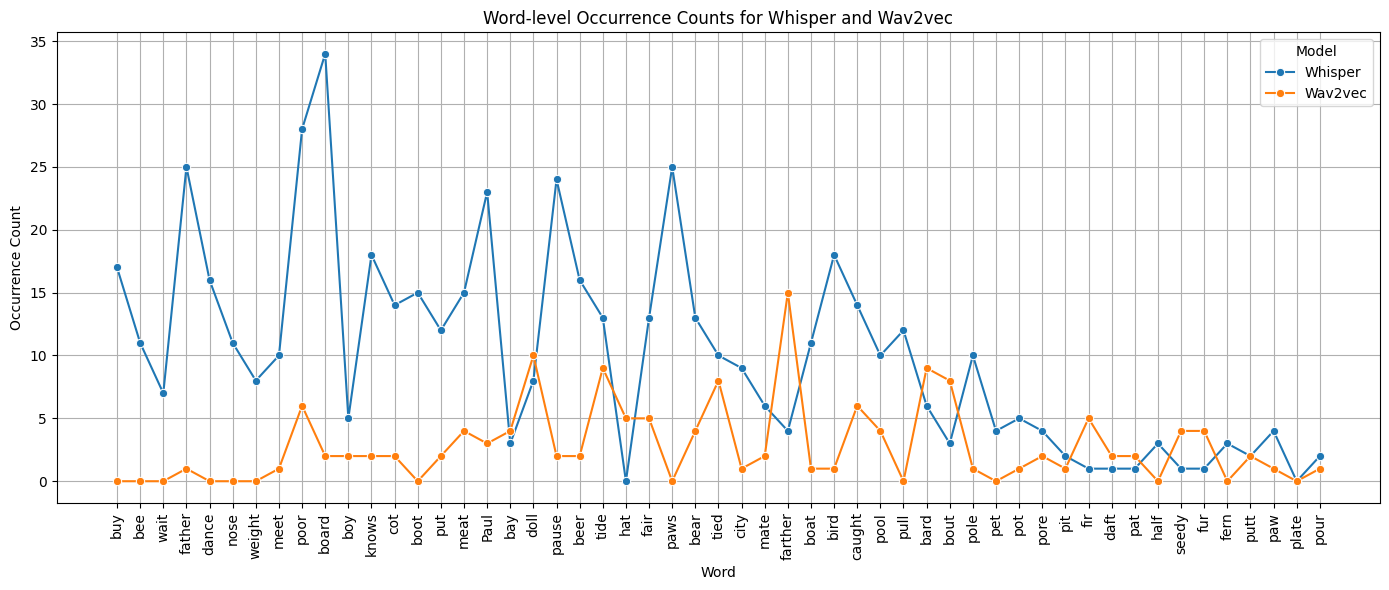

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_lineplot(data):
    # convert to dataframe
    df = pd.DataFrame(data, columns=['Word', 'Whisper', 'Wav2vec'])
    
    # keep original order for the x-axis
    word_order = df['Word'].tolist()
    
    # melt into long format for seaborn
    df_melted = df.melt(id_vars='Word', var_name='Model', value_name='Count')
    
    # plot
    plt.figure(figsize=(14, 6))
    sns.lineplot(
        data=df_melted, 
        x='Word', 
        y='Count', 
        hue='Model', 
        marker='o',
        sort=False  # important to preserve order
    )
    
    plt.xticks(rotation=90)
    plt.xlabel('Word')
    plt.ylabel('Occurrence Count')
    plt.title('Word-level Occurrence Counts for Whisper and Wav2vec')
    plt.tight_layout()
    plt.grid(True)
    
    # fix the order on x-axis
    plt.gca().set_xticks(range(len(word_order)))
    plt.gca().set_xticklabels(word_order)

    plt.savefig("./graphs/occurences_models", bbox_inches='tight')
    plt.show()
    plt.close()

# usage
generate_lineplot(ws4)



In [104]:
## count the number of FN and number of FN when confidence score < 0.1, or other values
def count_fn_con(ea, typ):
    confi_list= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]       
    fn_lst = []
    for confi in confi_list:        
        count_fn_con = 0
        for item in ea:
            if item['type'] == typ:
                if item['confidence_scores']['sum_w2v'] < confi and item['confidence_scores']['sum_whisper'] < confi:
                    count_fn_con += 1
        fn_lst.append(count_fn_con)
    return fn_lst

count_fn_con(ea_unintelligible,'FN')
 

[0, 0, 1, 1, 3, 6, 14, 23, 34]

In [105]:
count_fn_con(ea_unintelligible,'TP') 

[0, 1, 2, 6, 17, 44, 71, 120, 173]

### The code to see false positives

In [106]:
def count_false_pos_transcript(ea, typ):    
    transcript_lst=[]
    word_lst = []
    for item in ea:
        if item['type'] == typ:
            word_lst.append(item['true_transcription'])
            transcript_lst.append(item['model_transcript'])
                
    l_whisper=[i['whisper'] for i in transcript_lst]
    l_whisper_zero, l_whisper_first,l_whisper_second = zip(*l_whisper) # Using zip(*)
       
    l_w2v=[i['w2v'] for i in transcript_lst]
    l_w2v_zero, l_w2v_first,l_w2v_second = zip(*l_w2v)

    return word_lst, l_whisper_zero, l_whisper_first, l_whisper_second, l_w2v_zero, l_w2v_first, l_w2v_second

fp_test_wordlist, l_whisper_zero, l_whisper_first, l_whisper_second, l_w2v_zero, l_w2v_first, l_w2v_second = count_false_pos_transcript(ea_unintelligible,'FP')  

In [107]:
def count_false_pos_cmud(ea, typ):    
    cmud_lst=[]
    target_cmud=[]
    for item in ea:
        if item['type'] == typ:
            cmud_lst.append(item['model_cmud'])
            target_cmud.append(item['true_cmud'])
 
    cmud_whisper=[i['whisper'] for i in cmud_lst]
    cmud_whisper_zero, cmud_whisper_first,cmud_whisper_second = zip(*cmud_whisper) # Using zip(*)
       
    cmud_w2v=[i['w2v'] for i in cmud_lst]
    cmud_w2v_zero, cmud_w2v_first,cmud_w2v_second = zip(*cmud_w2v)

    return target_cmud, cmud_whisper_zero, cmud_whisper_first, cmud_whisper_second, cmud_w2v_zero, cmud_w2v_first, cmud_w2v_second
fp_target_cmud, cmud_whisper_zero, cmud_whisper_first, cmud_whisper_second, cmud_w2v_zero, cmud_w2v_first, cmud_w2v_second = count_false_pos_cmud(ea_unintelligible,'FP')


In [108]:
#print(l_whisper_zero[0:1000])
#print(l_whisper_second[0:1000])
from collections import Counter
def stats_whisper_w2v(test_wordlist, l_w, cmud_w, target_cmud):
    two_words_lst=[]    
    hallu_lst=[]    
    starting_conso_lst=[]    
    dif_conso_lst=[]    
    misspell_lst=[]
    n_a = 0
    for item, cmud, word, t_cmud in zip(l_w, cmud_w, test_wordlist, target_cmud):        
        if item.count(' ')>=1:
            #count_two_words+=1
            two_words_lst.append((item, word))
            if item.count(' ')>=2:
                #count_hallu +=1
                hallu_lst.append((item,word))
        elif item == 'N/A':
                n_a += 1
        elif item != 'N/A' and item.count(' ') == 0: 
            if len(item)> 15:               
               # count_hallu += 1
                hallu_lst.append((item,word))                
            elif item and word and item[0].lower() == word[0].lower() and cmud != 'N/A':
                #count_starting_conso += 1
                starting_conso_lst.append((item, word, cmud, t_cmud))
            elif item and word and item[0].lower() != word[0].lower():
                #count_dif_conso += 1
                dif_conso_lst.append((item, word, cmud, t_cmud))       
            elif item and item !='N/A' and cmud == 'N/A':
                #count_misspell+=1
                misspell_lst.append((item,word))    
    
    print('-----------------N/A-----------------')  
    print(n_a)
    print('-----------------more than two words-----------------')    
    print(len(two_words_lst))
    print(two_words_lst[0:10])
    print('-----------------hallucination-----------------')  
    print(len(hallu_lst))
    print(hallu_lst[0:10])
    
    
    print('-----------------mispell or non existent-----------------')  
    print(len(misspell_lst))
    print(misspell_lst[0:10])

    print('-----------------same initial consonant-----------------')  
    print(len(starting_conso_lst))
    print(starting_conso_lst[15:25])
    near_homoph_start=[]
    for item in starting_conso_lst:
        split_cmud= item[2].split()
        split_cmud_true= item[3].split()
        if split_cmud[0:2]==split_cmud_true[0:2]:
            near_homoph_start.append(item)
    print('-----------------near_homoph_same initial consonant------------------')
    print(len(near_homoph_start))
    print(near_homoph_start[0:10])
    
    print('-----------------different starting consonant-----------------')  
    print(len(dif_conso_lst))
    print(dif_conso_lst[15:25])
    near_homoph_end=[]
    for item in dif_conso_lst:
        split_cmud= item[2].split()
        split_cmud_true= item[3].split()
        if split_cmud[-2:]==split_cmud_true[-2:]:
            near_homoph_end.append(item)
    print('-----------------near_homoph_end_different starting consonant-------------')
    print(len(near_homoph_end))
    print(near_homoph_end[0:10])

    print('-----------------misspelling non existent-------------')
    print(len(misspell_lst))
    print(misspell_lst[0:10])
        
    # stats about distribu of two_words, hallucination, starting consonant, different consonant, misspelling
    for title, lst in zip(['two_words','hallu','same_ini_conso','diff_ini_conso','misspell'], [two_words_lst, hallu_lst, near_homoph_start, near_homoph_end,misspell_lst]):
        adapted_list = [i[1] for i in lst]
        print(title)
        print(Counter(adapted_list))
        
print('first res of whisper:')    
stats_whisper_w2v(fp_test_wordlist,l_whisper_zero, cmud_whisper_zero,fp_target_cmud)
print('second res of whisper:')  
stats_whisper_w2v(fp_test_wordlist,l_whisper_first,cmud_whisper_first,fp_target_cmud)
print('third res of whisper:')  
stats_whisper_w2v(fp_test_wordlist,l_whisper_second,cmud_whisper_second,fp_target_cmud)


first res of whisper:
-----------------N/A-----------------
0
-----------------more than two words-----------------
108
[('the bards', 'bard'), ('good day', 'bay'), ('what are we doing', 'bee'), ('for being', 'bee'), ('be you', 'beer'), ('be here', 'beer'), ('see you', 'beer'), ('see you', 'beer'), ('be ya', 'beer'), ('be you', 'beer')]
-----------------hallucination-----------------
39
[('what are we doing', 'bee'), ('there it is', 'bird'), ('for the next part', 'board'), ('all right all right', 'caught'), ('see you then', 'city'), ('and thats it it was our first time so see theyve all got to be yeah its its ill go ahead yeah yeah thats this is such im i i like like this i like i like', 'city'), ('see you dear', 'city'), ('cd and cd', 'city'), ('see you next time', 'city'), ('oh my god', 'cot')]
-----------------mispell or non existent-----------------
56
[('bod', 'bard'), ('ba', 'bear'), ('bod', 'board'), ('bote', 'boot'), ('boud', 'bout'), ('boult', 'bout'), ('bollywood', 'boy'), ('

In [109]:
stats_whisper_w2v(fp_test_wordlist,l_w2v_zero, cmud_w2v_zero,fp_target_cmud)
print()
stats_whisper_w2v(fp_test_wordlist,l_w2v_first,cmud_w2v_first,fp_target_cmud)
print()
stats_whisper_w2v(fp_test_wordlist,l_w2v_second,cmud_w2v_second,fp_target_cmud)

-----------------N/A-----------------
0
-----------------more than two words-----------------
108
[('ol d', 'Paul'), ('re ward', 'bard'), ('bad c', 'bard'), ('of being', 'bee'), ('be you', 'beer'), ('be yere', 'beer'), ('be here', 'beer'), ('i behere', 'beer'), ('be here', 'beer'), ('di her', 'beer')]
-----------------hallucination-----------------
9
[('l blow it', 'boat'), ('it wer most', 'bout'), ('to i an', 'daft'), ('tive is ere', 'farther'), ('far de ver', 'farther'), ('hand good go', 'hat'), ('but no its', 'knows'), ('i am woosed', 'knows'), ('iwo wit for m', 'pool')]
-----------------mispell or non existent-----------------
187
[('poy', 'Paul'), ('bartd', 'bard'), ('bod', 'bard'), ('bided', 'bard'), ('biy', 'bay'), ('boane', 'bay'), ('bave', 'bay'), ('biy', 'bay'), ('beya', 'beer'), ('beye', 'beer')]
-----------------same initial consonant-----------------
201
[('be', 'bay', 'B IY1', 'B EY1'), ('bad', 'bear', 'B AE1 D', 'B EH1 R'), ('bailer', 'bear', 'B EY1 L ER0', 'B EH1 R'), (

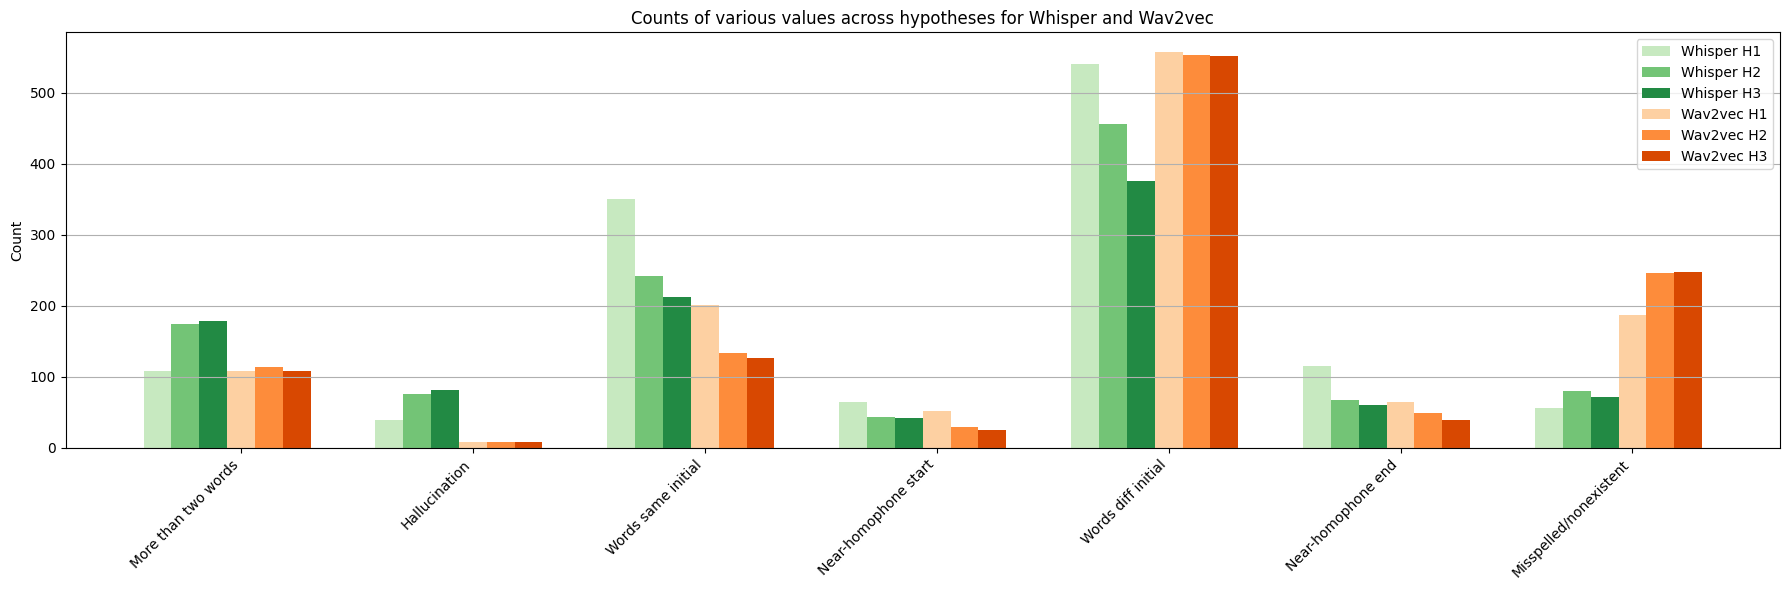

In [110]:

asr_values = {
    "More than two words": {"Whisper": [108, 175, 179], "Wav2vec": [108, 114, 108]},
    "Hallucination": {"Whisper": [39, 76, 82], "Wav2vec": [9, 9, 8]},
    "Words same initial": {"Whisper": [350, 242, 213], "Wav2vec": [201, 133, 126]},
    "Near-homophone start": {"Whisper": [65, 43, 42], "Wav2vec": [52, 30, 25]},
    "Words diff initial": {"Whisper": [540, 456, 376], "Wav2vec": [557, 553, 551]},
    "Near-homophone end": {"Whisper": [115, 68, 60], "Wav2vec": [65, 49, 40]},
    "Misspelled/nonexistent": {"Whisper": [56, 80, 72], "Wav2vec": [187, 246, 247]}
}

systems = ["Whisper", "Wav2vec"]
n_values = len(asr_values)
n_hypotheses = 3
bar_width = 0.12

# Create color palettes for each system (3 colors each)
palette_whisper = sns.color_palette("Greens", n_hypotheses)
palette_w2v = sns.color_palette("Oranges", n_hypotheses)

palettes = {"Whisper": palette_whisper, "Wav2vec": palette_w2v}

# x positions for metrics
x = np.arange(n_values)

plt.figure(figsize=(18,6))

# Plot bars with colors from palettes
for i, system in enumerate(systems):
    for j in range(n_hypotheses):
        nvalues = [asr_values[m][system][j] for m in asr_values]
        positions = x + i*bar_width*n_hypotheses + j*bar_width
        plt.bar(positions, nvalues, width=bar_width, color=palettes[system][j], label=f'{system} H{j+1}')

# Set xticks in the middle of each metric group
xtick_positions = x + bar_width*n_hypotheses
plt.xticks(xtick_positions, list(asr_values.keys()), rotation=45, ha='right')

plt.ylabel("Count")
plt.title("Counts of various values across hypotheses for Whisper and Wav2vec")
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## Here, we also use the best-performing configuration on Zou's test dataset

In [111]:
## Testing on Zou's test dataset

# using Zou's test files
furong_test_whisper07_output_json_file = "./tst_json_files/transcription_output/whisper_processed_output/furong_whisper07_test_output.json"
furong_test_multi_w2v_output_json_file_path = "./tst_json_files/transcription_output/w2v_processed_output/furong_test_w2v_output.json"

# calling
fr_test_single_true_labels, fr_test_true_cmuds, fr_test_whisper07_judge_phonetic, fr_test_w2v_judge_phonetic = two_model_intelligibility_labels(furong_test_whisper07_output_json_file, furong_test_multi_w2v_output_json_file_path)


In [112]:
fr_test_metrics_test, fr_test_lst_top_1,fr_test_lst_top_2,fr_test_lst_top_3 = error_analysis_results_at_confidence(test_confidence_thresholds, fr_test_whisper07_judge_phonetic,fr_test_w2v_judge_phonetic, fr_test_true_cmuds, fr_test_single_true_labels)


In [113]:
# for Furong's test dataset
calculate_metrics(fr_test_single_true_labels, fr_test_lst_top_3)

{'precision_intelligible': 0.8464088397790055,
 'recall_intelligible': 0.5432624113475177,
 'f1_intelligible': 0.6617710583153348,
 'f0.5_intelligible': 0.7614314115308151,
 'precision_unintelligible': 0.4677685950413223,
 'recall_unintelligible': 0.8028368794326242,
 'f1_unintelligible': 0.5911227154046996,
 'f0.5_unintelligible': 0.5103697024346258}